# EDA for Loan Data Set

Importing required Libraries

In [ ]:
# import pandas libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format

#increase max row and column display value
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

Loading Data into DataFrame

In [146]:
#Loading data set file into data frame
#using low memory flag to load columns with multiple data types.
data = pd.read_csv('loan.csv', low_memory=False)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

In [147]:
#find the shape of loan data set
data.shape

(39717, 111)

In [148]:
#Tail rows of the data frame
data.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500          1075.00   36 months   
39713  90665      90607       8500         8500           875.00   36 months   
39714  90395      90390       5000         5000          1325.00   36 months   
39715  90376      89243       5000         5000           650.00   36 months   
39716  87023      86999       7500         7500           800.00   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE   110000.00        Not Verified  Jul-07   
39713    3 years           RENT    18000.00        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE   100000.00        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE   200000.00        Not Verified  Jul-07   
39716   < 1 year            OWN    22000.00        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state   dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO 11.33            0   
39713  Retiring credit card debt    274xx         NC  6.40            1   
39714     MBA Loan Consolidation    017xx         MA  2.30            0   
39715                   JAL Loan    208xx         MD  3.72            0   
39716         Consolidation Loan    027xx         MA 14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                    0.00   
39713           Dec-86               1                    5.00   
39714           Oct-98               0                    0.00   
39715           Nov-88               0                    0.00   
39716           Oct-03               0                   11.00   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                    0.00        13        0       7274     13.10%   
39713                    0.00         6        0       8847     26.90%   
39714                    0.00        11        0       9698     19.40%   
39715                    0.00        17        0      85607      0.70%   
39716                    0.00         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f       0.00           0.00      2822.97   
39713          9                   f       0.00           0.00      9913.49   
39714         20                   f       0.00           0.00

### Data Preparation

Finding percentage of missing values

In [149]:
#Finding percentage of null or missing values
null_percentage = round(100*(data.isnull().sum()/len(data.index)),2)
#Printing columns that have more than 0% missing value
null_percentage[null_percentage > 0]

emp_title                          6.19
emp_length                         2.71
desc                              32.59
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


Dropping columns with 100% null values

In [150]:
#Dropping columns that have 100% null values
data.drop(null_percentage[ null_percentage == 100].index, axis = 1, inplace = True)

Checking the data frame after dropping

In [151]:
#Finding percentage of null or missing values
null_percentage = round(100*(data.isnull().sum()/len(data.index)),2)
#Printing columns that have more than 0% missing value
null_percentage[null_percentage > 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.59
title                         0.03
mths_since_last_delinq       64.66
mths_since_last_record       92.99
revol_util                    0.13
last_pymnt_d                  0.18
next_pymnt_d                 97.13
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

There are a few columns having null values over 30%, we can drop these as well

In [152]:
#Dropping columns having more than 30% null values
data.drop(null_percentage[ null_percentage > 30].index, axis = 1, inplace = True)

Checking the data frame after dropping

In [153]:
#Finding percentage of null or missing values
null_percentage = round(100*(data.isnull().sum()/len(data.index)),2)
#Printing columns that have more than 0% missing value
null_percentage[null_percentage > 0]

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

Data Frame after removing missing values

In [154]:
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

          purpose                 title zip_code addr_state   dti  \
0     credit_card              Computer    860xx         AZ 27.65   
1             car                  bike    309xx         GA  1.00   
2  small_business  real estate business    606xx         IL  8.72   
3           other              personel    917xx         CA 20.00   
4           other              Personal    972xx         OR 17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      5863.16          5833.84          5000.00         863.16   
1      1008.71          1008.71           456.46         435.17   
2      3005.67          3005.67          2400.00         605.67   
3     12231.89         12231.89         10000.00        2214.92   
4      3513.33          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_pymnt_amnt la

Finding unique values in columns

In [155]:
data.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

As we can see there are columns having only 1 unique value, *'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status' and 'pymnt_plan'* columns have only one unique value in all the rows, which will not be useful for our analysis. so, lets remove them.

In [156]:
#Dropping Columns with only one values.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [157]:
#Finding number of unique values
data.nunique().sort_values(ascending=True)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [158]:
#Data Frame after removing missing values
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

                                                 url         purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...             car   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business   
3  https://lendingclub.com/browse/loanDetail.acti...           other   
4  https://lendingclub.com/browse/loanDetail.acti...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   

   total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0          9       0.00           0.00      5863.16          5833.84   
1          4       0.00           0.00      1008.71          1008.71   
2         10       0.00           0.00      3005.67          3005.67   
3         37       0.00           0.00     12231.89         12231.89   
4         38     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
4          2475.94        1037.39                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15           171.62             May-16   
1                     1.11       Apr-13           119.66             Sep-13   
2                     0.00       Jun-14           649.91             May-16   
3                     0.00       Jan-15           357.48             Apr-16   
4                     0.00       May-16            67.79             Ma

**emp_title and title** are text based columns, they wont be useful for our analysis. We can drop these columns

In [159]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

**id, url and member_id** are having unique values, which means any one of these can be used as index. Let's use **id** as index and drop the other two columns

In [160]:
data.drop(['member_id', 'url'], axis=1, inplace=True)

**total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_credit_pull_d,  out_prncp, out_prncp_inv** variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed.
**recoveries, collection_recovery_fee** columns are only valid for charged off loans.
Will removed these colomns.

In [161]:
delete_columns = [ 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
                  'last_credit_pull_d', 'out_prncp', 'out_prncp_inv']
data.drop(columns=delete_columns, axis=1, inplace=True)
data.shape

(39717, 31)

In [162]:
#Finding percentage of null or missing values
null_percentage = round(100*(data.isnull().sum()/len(data.index)),2)
#Printing columns that have more than 0% missing value
null_percentage[null_percentage > 0]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

Removing null values rows in abaove columns

In [163]:
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

**Loan Status** Column has 3 distict values out of them we need only _Fully Paid_ and _Charged Off_. So, we will remove the rows with _Current_ values in loan status.

In [164]:
#Removing current loan status rows
data = data[data.loan_status != 'Current']

In [165]:
#Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

There is empty space at the start of values in term column

In [166]:
#Stripping empty space in values in term column
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [167]:
data.shape

(36800, 31)

### Data type Conversion

In [168]:
# Finding datatype in all coulmns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

**int_rate and revol_util** are having '%' symbol in them and are having data type of object. Let's remove % at the end and convert to float

In [169]:
#stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

In [170]:
# Finding datatype in all coulmns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

In [171]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-11   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-11  Charged Off             car    309xx   
2        Not Verified  Dec-11   Fully Paid  small_business    606xx   
3     Source Verified  Dec-11   Fully Paid           other    917xx   
5     Source Verified  Dec-11   Fully Paid         wedding    852xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0           Jan-85               1         3   
1         GA  1.00            0           Apr-99               5         3   
2         IL  8.72            0           Nov-01               2         2   
3         CA 20.00            0           Feb-96               1        10   
5         AZ 11.20            0           Nov-04               3         9   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies  
0           171.62                  0.00  
1           119.66                  0.00  
2           649.91                  0.00  
3           357.48                  0.00  
5           161.03                  0.00

**issue_d, earliest_cr_line** are having date values, let convert column data type to date.

In [172]:
#converting to date type
import datetime
def convert_to_mmm_yyyy_format(date_string):
    parsed = datetime.datetime.strptime(date_string,'%b-%y')
    current_date = datetime.datetime.now()
    if parsed > current_date:
        parsed = parsed.replace(year=parsed.year - 100)
    return parsed.strftime("%b-%Y")

In [173]:
#convert to MMM-YYYY format
data['issue_d'] = data['issue_d'].apply(lambda x : convert_to_mmm_yyyy_format(x))
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x : convert_to_mmm_yyyy_format(x))

In [174]:
data['issue_d'].unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Aug-2007'], dtype=object)

In [175]:
data['earliest_cr_line'].unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Nov-2004',
       'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004', 'Jan-1998',
       'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007', 'Oct-1998',
       'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997', 'Feb-1983',
       'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002', 'Aug-1984',
       'Nov-2006', 'Dec-1987', 'Nov-1981', 'Apr-2005', 'Oct-2007',
       'Dec-2000', 'Apr-2007', 'Jan-2003', 'Mar-1994', 'Sep-1998',
       'Jun-2004', 'Nov-1995', 'Jul-1999', 'Jun-1995', 'Sep-1992',
       'Jan-2002', 'Apr-1992', 'Oct-2006', 'May-2000', 'Dec-1998',
       'Dec-2004', 'Oct-2000', 'May-2002', 'May-2006', 'Jul-2002',
       'Jul-2006', 'May-1997', 'Oct-2005', 'Apr-1995', 'Oct-2002',
       'Jan-2000', 'Apr-2000', 'Dec-1994', 'Sep-2005', 'Dec-1984',
       'Dec-1999', 'Nov-2003', 'Jun-1989', 'Jun-2003', 'Oct-1996',
       'May-2003', 'Jun-2002', 'Jun-2007', 'Dec-1996', 'Sep-2002',
       'Jan-1986', 'May-1998', 'Jan-1997', 'Jun-2005', 'Feb-19

In [176]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status   issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-2011   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-2011  Charged Off             car    309xx   
2        Not Verified  Dec-2011   Fully Paid  small_business    606xx   
3     Source Verified  Dec-2011   Fully Paid           other    917xx   
5     Source Verified  Dec-2011   Fully Paid         wedding    852xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0         Jan-1985               1         3   
1         GA  1.00            0         Apr-1999               5         3   
2         IL  8.72            0         Nov-2001               2         2   
3         CA 20.00            0         Feb-1996               1        10   
5         AZ 11.20            0         Nov-2004               3         9   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies  
0           171.62                  0.00  
1           119.66                  0.00  
2           649.91                  0.00  
3           357.48                  0.00  
5           161.03                  0.00

### Extracting derived columns:

Create new columns from date type columns:

In [177]:
data['issue_d_year']= data['issue_d'].apply(lambda x : int(x.split('-')[1]))

In [178]:
data['issue_d_year'].unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

In [179]:
data['issue_d_year'] = data['issue_d_year'].astype(object)

In [180]:
data['issue_d_year'].unique()

array([2011, 2010, 2009, 2008, 2007], dtype=object)

In [181]:
data['issue_d_month']= data['issue_d'].apply(lambda x : str(x.split('-')[0]))

In [182]:
data['issue_d_month'].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [183]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status   issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-2011   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-2011  Charged Off             car    309xx   
2        Not Verified  Dec-2011   Fully Paid  small_business    606xx   
3     Source Verified  Dec-2011   Fully Paid           other    917xx   
5     Source Verified  Dec-2011   Fully Paid         wedding    852xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0         Jan-1985               1         3   
1         GA  1.00            0         Apr-1999               5         3   
2         IL  8.72            0         Nov-2001               2         2   
3         CA 20.00            0         Feb-1996               1        10   
5         AZ 11.20            0         Nov-2004               3         9   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_month  
0           171.62                  0.00         2011           Dec  
1           119.66                  0.00         2011           Dec  
2           649.91                  0.00         2011           Dec  
3           357.48                  0.00         2011           Dec  
5           161.03                  0.00         2011           Dec

From **earliest_cr_line** column derived year, month:

In [184]:
data['earliest_cr_line_year'] = data['earliest_cr_line'].apply(lambda x : int(x.split('-')[1]))

In [185]:
data['earliest_cr_line_month'] = data['earliest_cr_line'].apply(lambda x : str(x.split('-')[0]))

In [186]:
data['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1976, 1977, 1982, 1968, 1974, 1967, 1965, 1973, 1963,
       1966, 1962, 1956, 1946, 1950, 1964, 1954], dtype=int64)

In [187]:
data['earliest_cr_line_month'].unique()

array(['Jan', 'Apr', 'Nov', 'Feb', 'Jul', 'Sep', 'Oct', 'May', 'Aug',
       'Jun', 'Dec', 'Mar'], dtype=object)

In [188]:
data.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
total_acc                   int64
total_pymnt               float64
total_pymnt_inv           float64
last_pymnt_amn

In [189]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status   issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-2011   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-2011  Charged Off             car    309xx   
2        Not Verified  Dec-2011   Fully Paid  small_business    606xx   
3     Source Verified  Dec-2011   Fully Paid           other    917xx   
5     Source Verified  Dec-2011   Fully Paid         wedding    852xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0         Jan-1985               1         3   
1         GA  1.00            0         Apr-1999               5         3   
2         IL  8.72            0         Nov-2001               2         2   
3         CA 20.00            0         Feb-1996               1        10   
5         AZ 11.20            0         Nov-2004               3         9   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_month  \
0           171.62                  0.00         2011           Dec   
1           119.66                  0.00         2011           Dec   
2           649.91                  0.00         2011           Dec   
3           357.48                  0.00         2011           Dec   
5           161.03                  0.00         2011           Dec   

   earliest_cr_line_year earliest_cr_line_month  
0                   1985                    Jan  
1                   1999                    Apr  
2                   2001                    Nov  
3                   1996                    Feb  
5                   2004                    Nov

## Univariate Analysis

### Loan Amount

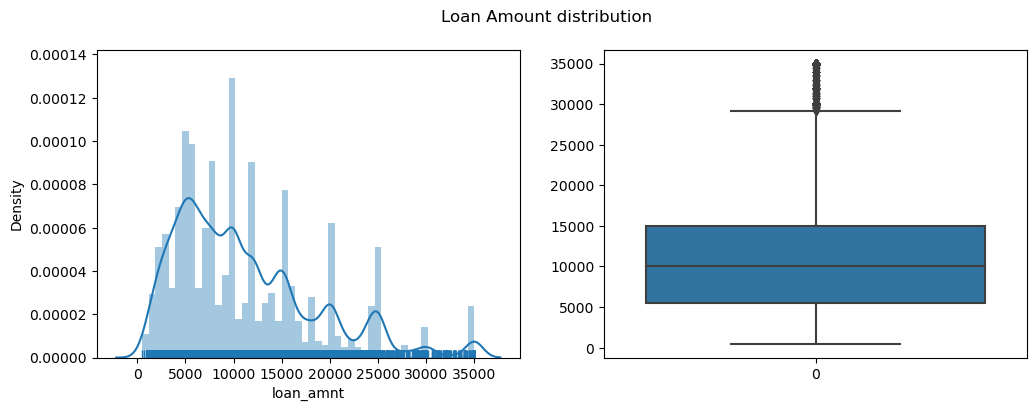

In [190]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [191]:
#Stats of laon amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    11149.54
std      7369.86
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

**Observations**:<br>
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

### Funded Amount: 
The total amount committed to that loan at that point in time.

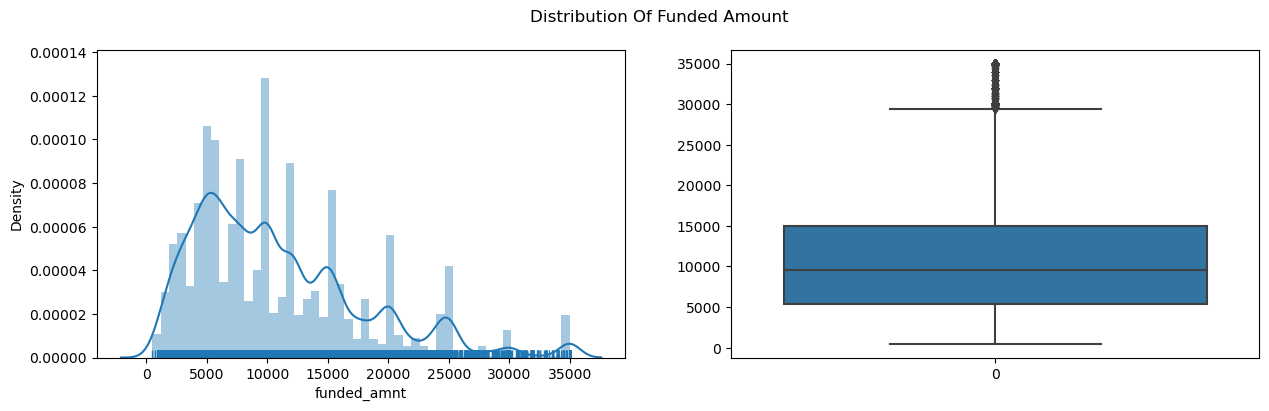

In [192]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Distribution Of Funded Amount')
plt.show()

In [193]:
data.funded_amnt.describe()

count   36800.00
mean    10880.79
std      7109.16
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

**Observations**:<br>
- The loan amount is nearly identical to the median loan funded amount, which stands at 9600.
- The lending club appears to have approved most of loan amount.

### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

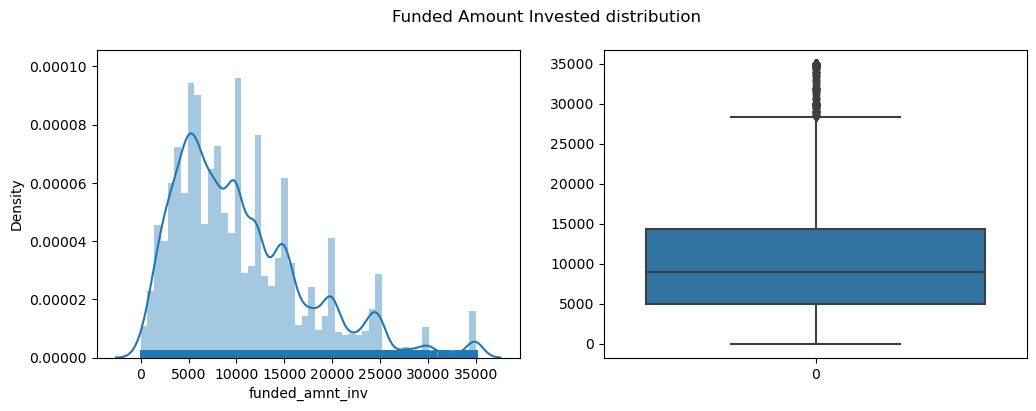

In [194]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [195]:
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    10439.06
std      7008.52
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      9000.00
75%     14350.00
90%     20000.00
95%     24655.82
99%     34725.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

**Observations** <br>
- Investment data for the funded amount operates in a similar manner to the loan amount, indicating that Lending Club has approved the majority of the applied loan amount.

### Interest Rate

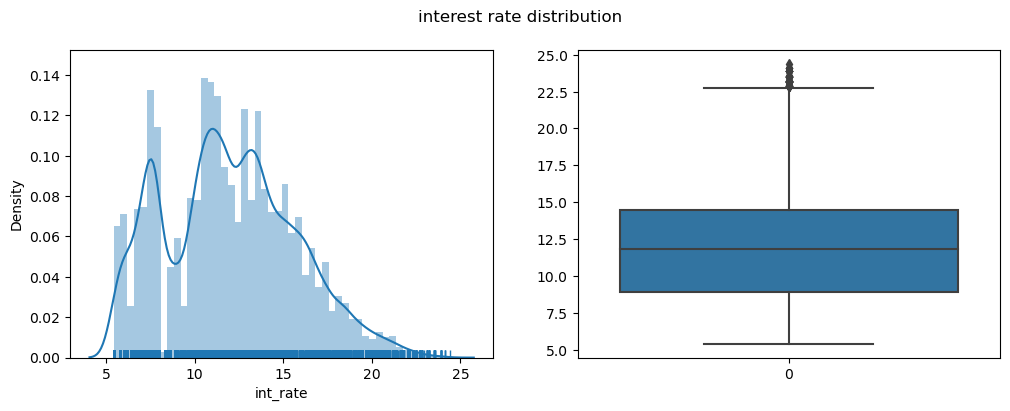

In [64]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

In [65]:
data.int_rate.describe()

count   36800.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

**Observations**:<br>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **9% to 14.5%**. Some people took loan at higher rates of interest i.e., **22.5%**

### Installment
The monthly payment owed by the borrower if the loan originates.

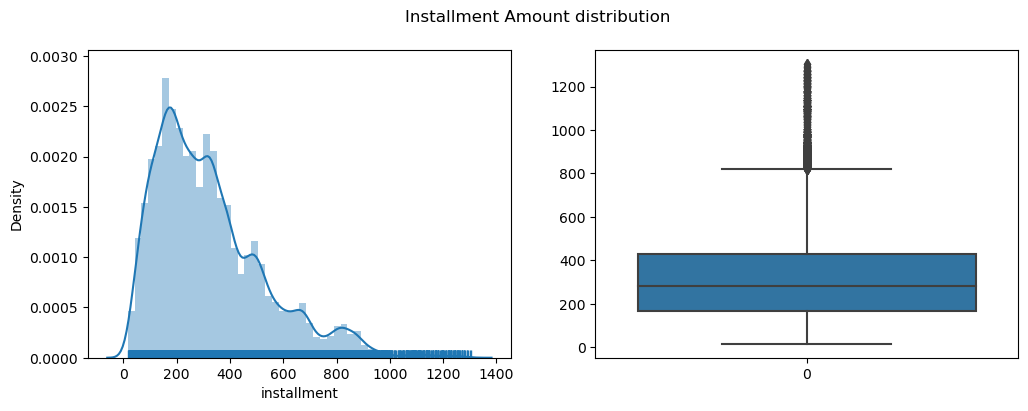

In [66]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

In [67]:
data.installment.describe()

count   36800.00
mean      324.91
std       208.89
min        16.08
25%       167.73
50%       280.11
75%       429.37
max      1305.19
Name: installment, dtype: float64

**Observations**:<br>
The median value of Installment amount in around 280.

### Annual Income
The self-reported annual income provided by the borrower during registration.

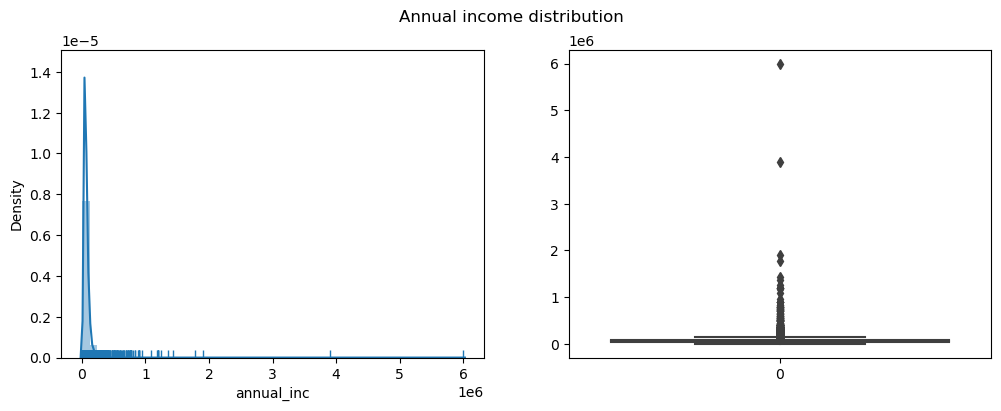

In [71]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

In [70]:
data.annual_inc.describe()

count     36800.00
mean      69434.48
std       64021.59
min        4000.00
25%       41133.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

**Observations**:<br>
- The median annual income is 60000

###  Debt to Income Ratio (dti)

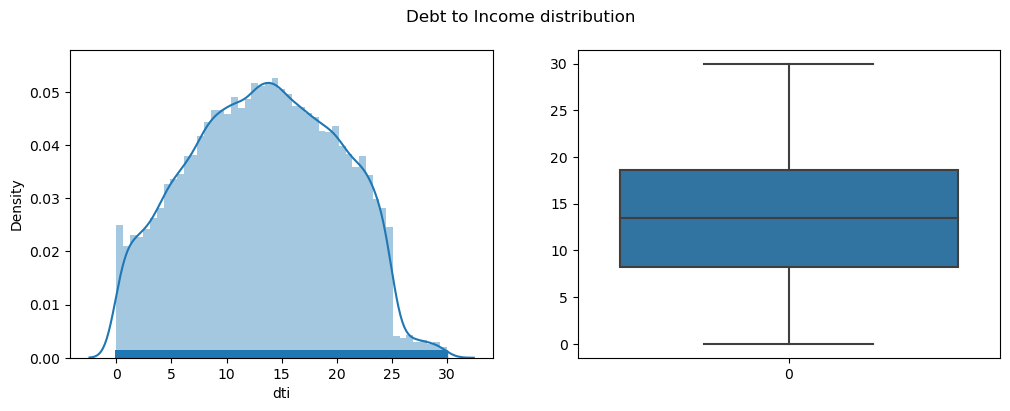

In [72]:
var = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var)
plt.suptitle('Debt to Income distribution')
plt.show()

In [73]:
data.dti.describe()

count   36800.00
mean       13.33
std         6.65
min         0.00
25%         8.22
50%        13.43
75%        18.59
max        29.99
Name: dti, dtype: float64

**Observations**:<br>
Looks like there are no outliers and the distribution is very much similar to normal distribution.
This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

### Public Derogatory Records (pub_rec)
Number of Public derogatory records

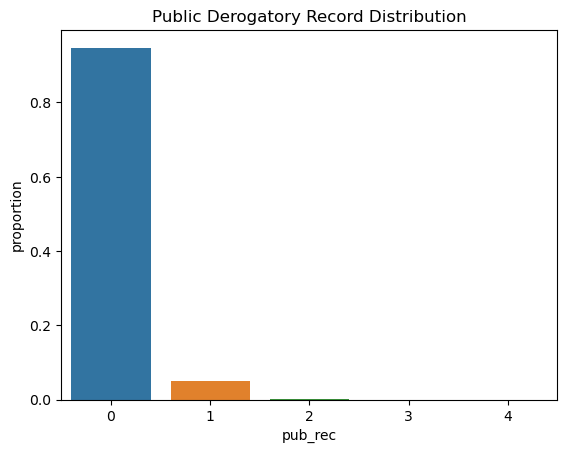

In [75]:
pub_df = data['pub_rec'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'pub_rec', y= 'proportion', data=pub_df)
plt.title('Public Derogatory Record Distribution')
plt.show()

**Observations**<br>
Around 90% borrower's are having no public derogatory records.

### Public Record Bankruptcies (pub_rec_bankruptcies)

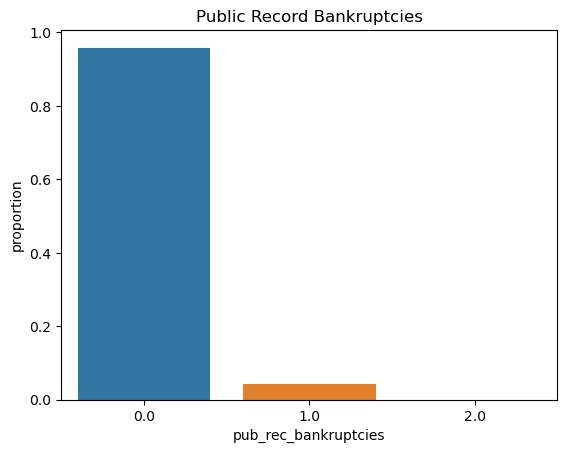

In [76]:
pub_df = data['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'pub_rec_bankruptcies', y= 'proportion', data=pub_df)
plt.title('Public Record Bankruptcies')
plt.show()

**Observations**:<br>
99% people have not went bankrupt.

### Loan Issue Year and Loan Issue Month

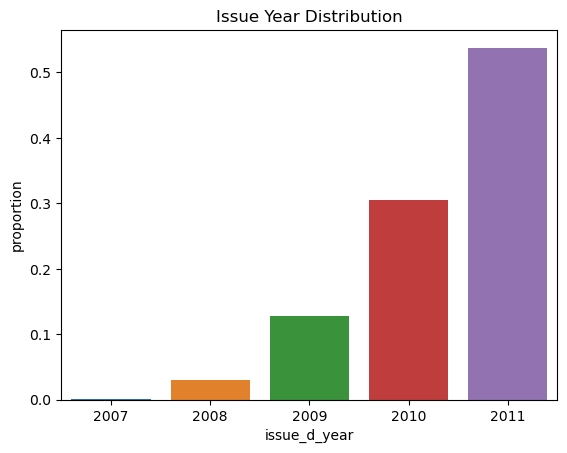

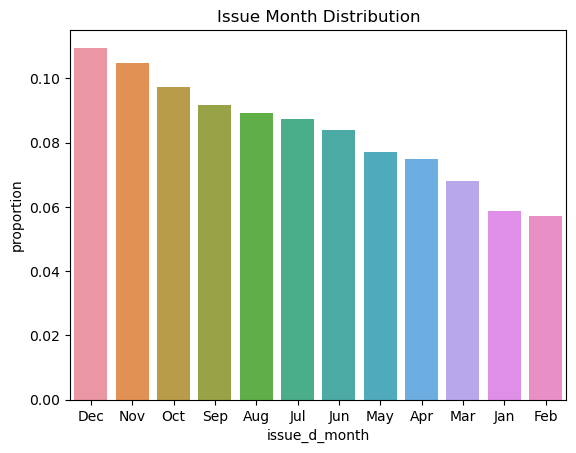

In [78]:
pub_df_year = data['issue_d_year'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'issue_d_year', y= 'proportion', data=pub_df_year)
plt.title('Issue Year Distribution')
plt.show()

pub_df_month = data['issue_d_month'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'issue_d_month', y= 'proportion', data=pub_df_month)
plt.title('Issue Month Distribution')
plt.show()

**Observation** <br>
- The lending club experiences a doubling of loan issues annually.
- The majority of loans have been approved during the months of October, November, and December.
- The approval of loans has witnessed a rise from March to December.

### Earliest Reported Credit Line(earliest_cr_line)

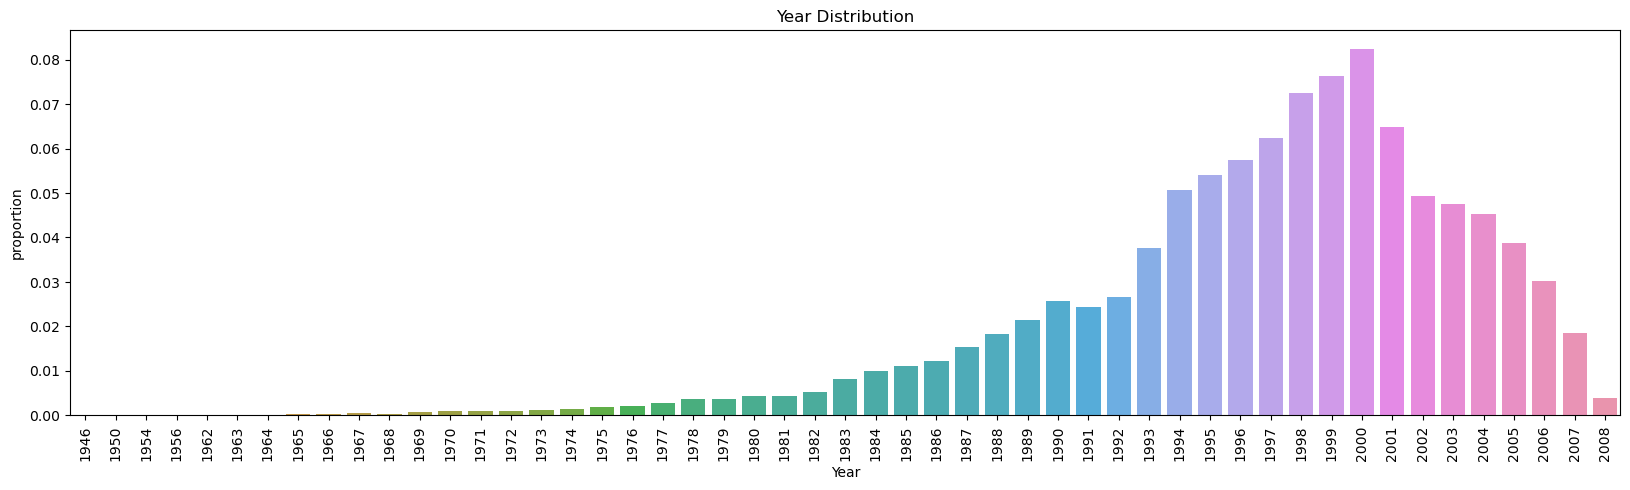

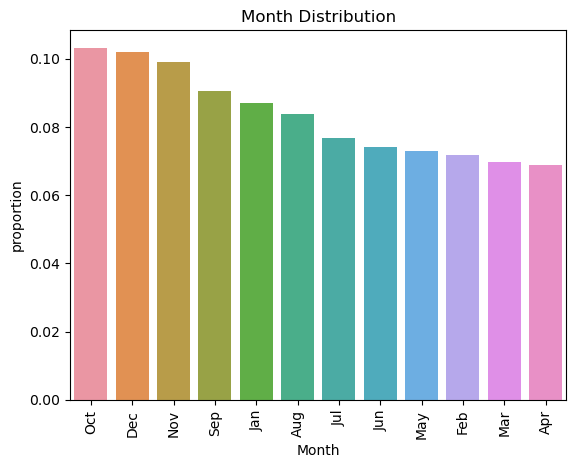

In [79]:
plt.figure(figsize=(20,5))
pub_df_year = data['earliest_cr_line_year'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'earliest_cr_line_year', y= 'proportion', data=pub_df_year)
plt.title('Year Distribution')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.show()

pub_df_month = data['earliest_cr_line_month'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'earliest_cr_line_month', y= 'proportion', data=pub_df_month)
plt.title('Month Distribution')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.show()

**Observations** <br>
- A significant number of Lending Clubs loan borrowers obtained their credit lines in the year 2000, while the majority acquired their credit lines towards the end of the year, specifically in October, November, or December.


### Term

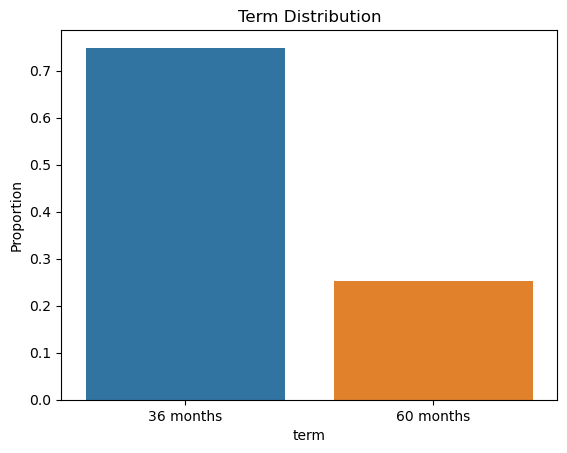

In [80]:
prob_df = data['term'].value_counts(normalize=True).reset_index()
sns.barplot(x='term', y='proportion', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('Term Distribution')
plt.show()

**Observations** <br>
- Borrowers have opted for a tenure of 36 months, than the 60-month tenure.

### Grade

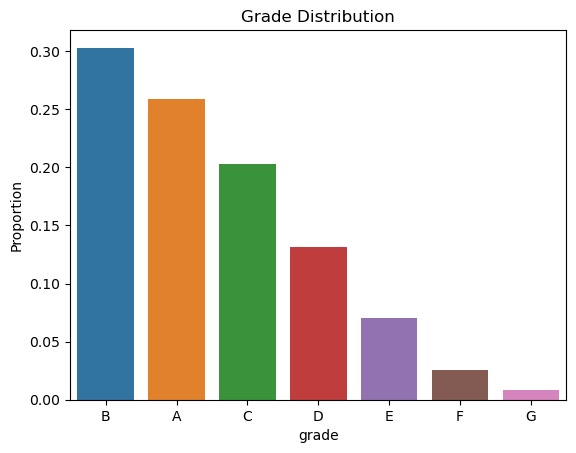

In [81]:
prob_df = data['grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='grade', y='proportion', data=prob_df)
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.title('Grade Distribution')
plt.show()

**Observation** <br>
- Most borrowers falls under grade of 'A' and 'B'

###  Sub Grade

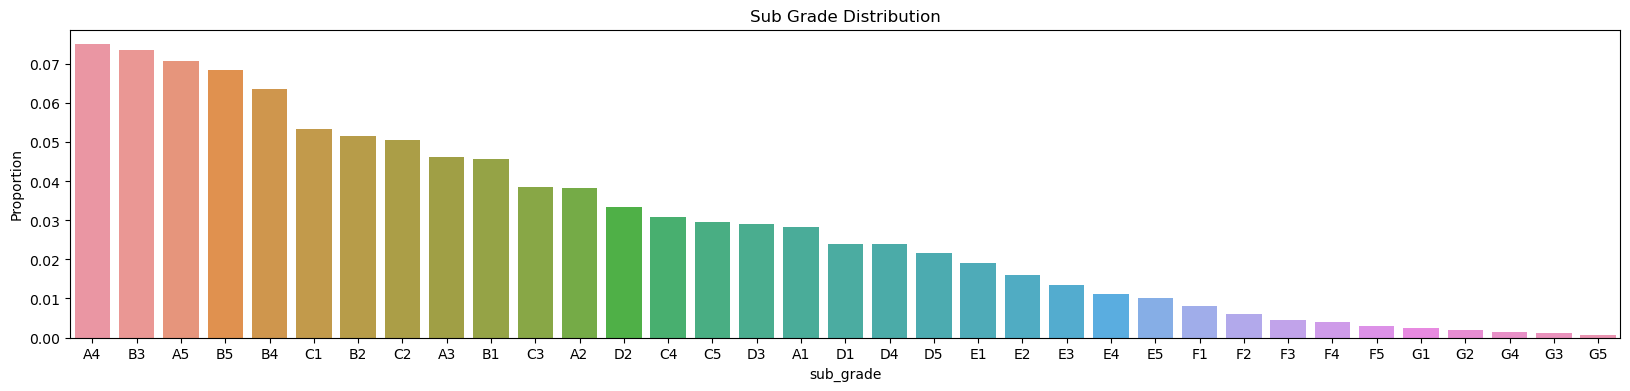

In [84]:
plt.figure(figsize=(20,4))
prob_df = data['sub_grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='sub_grade', y='proportion', data=prob_df)
plt.xlabel('sub_grade')
plt.ylabel('Proportion')
plt.title('Sub Grade Distribution')
plt.show()

**Observation** <br>
- Most borrowers falls under sub grade of 'A4' and 'B3'

### Employee Length

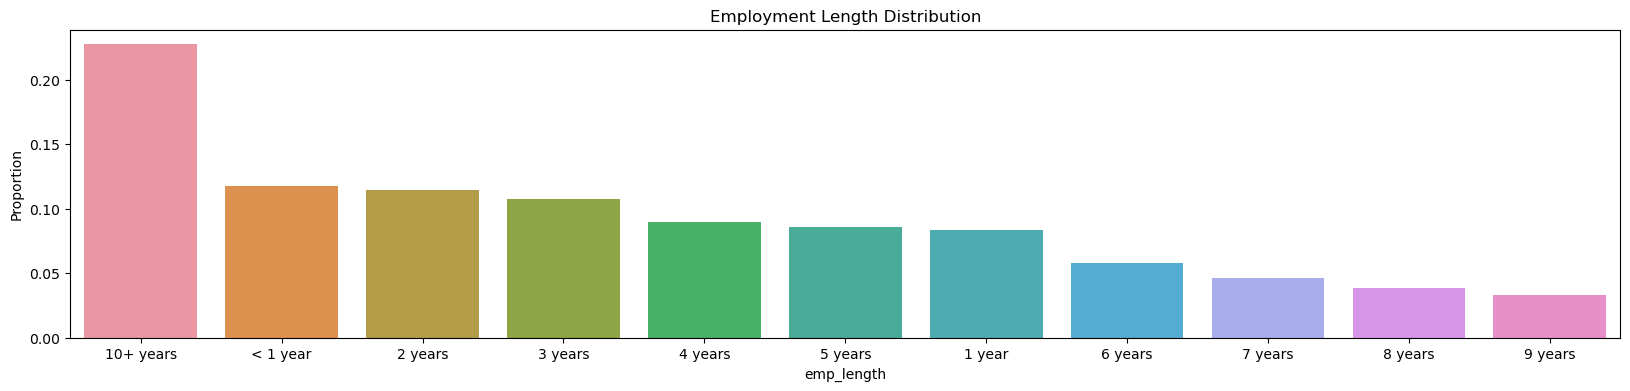

In [85]:
plt.figure(figsize=(20,4))
prob_df = data['emp_length'].value_counts(normalize=True).reset_index()
sns.barplot(x='emp_length', y='proportion', data=prob_df)
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('Employment Length Distribution')
plt.show()

**Observations** <br>
- Most borrowers falls under emplloyee length of 10+ year

### Home Ownership

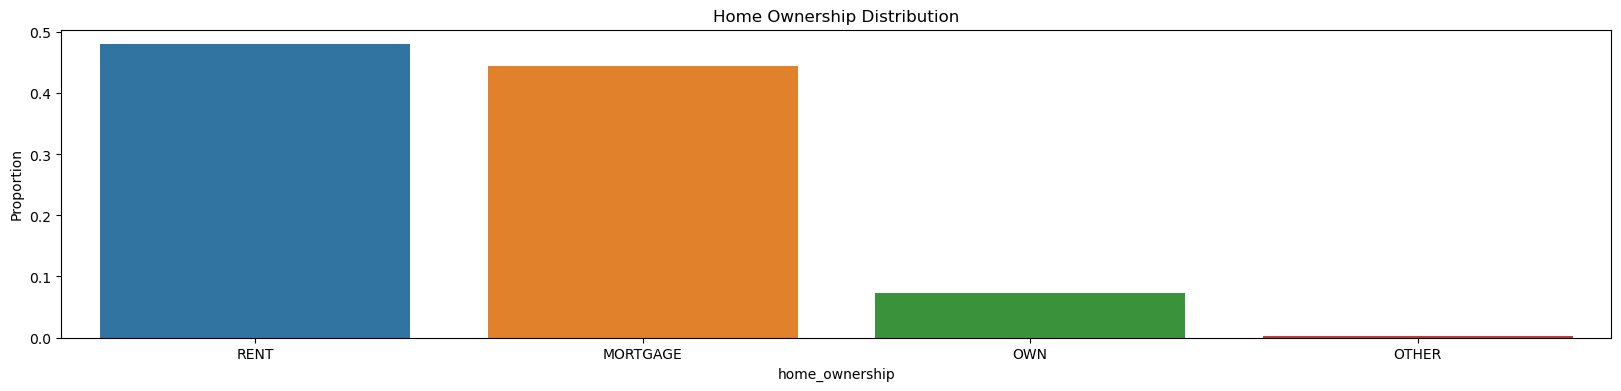

In [86]:
plt.figure(figsize=(20,4))
prob_df = data['home_ownership'].value_counts(normalize=True).reset_index()
sns.barplot(x='home_ownership', y='proportion', data=prob_df)
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.title('Home Ownership Distribution')
plt.show()

**Observations** <br>
- Most borrowers have "Rent" or "Mortgage" houses

### Verification Status

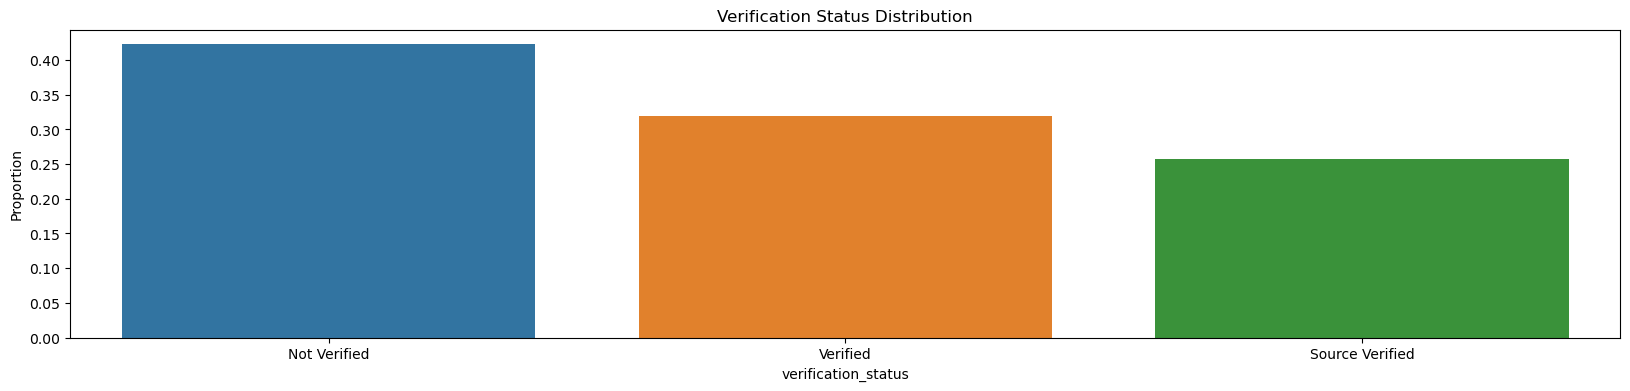

In [87]:
plt.figure(figsize=(20,4))
prob_df = data['verification_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='verification_status', y='proportion', data=prob_df)
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.title('Verification Status Distribution')
plt.show()

**Observations** <br>
- Most of loan given without verification

### Loan Status

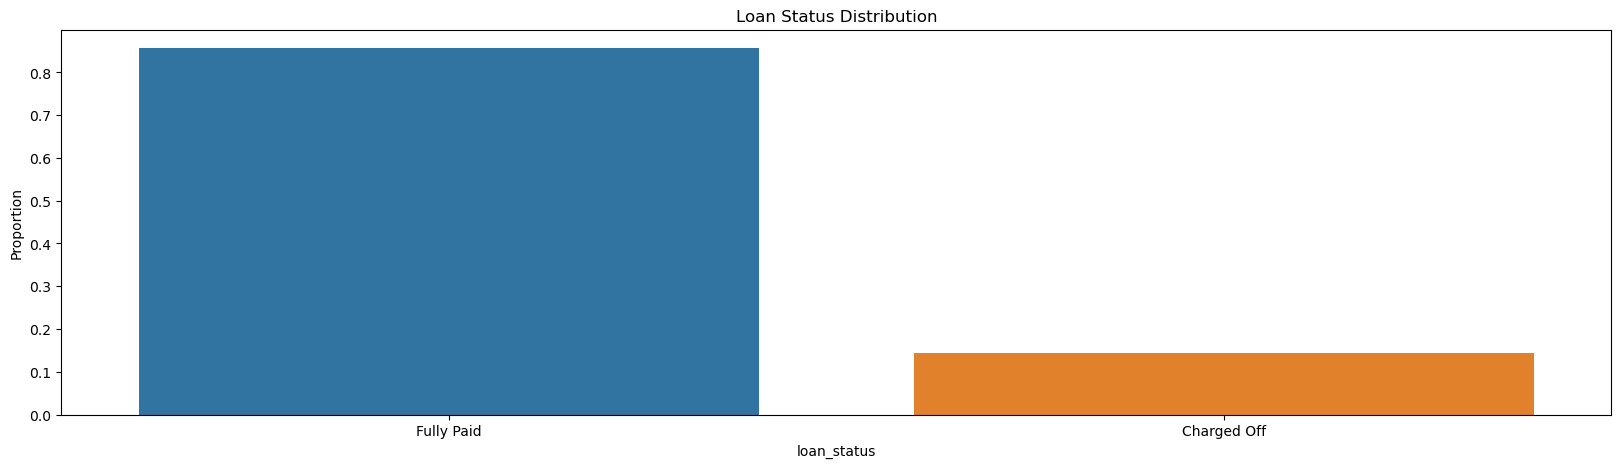

In [88]:
plt.figure(figsize=(20,5))
prob_df = data['loan_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='loan_status', y='proportion', data=prob_df)
plt.xlabel('loan_status')
plt.ylabel('Proportion')
plt.title('Loan Status Distribution')
plt.show()

**Observation** <br>
- More than 80% of borrowers has paid the loan fully.

### Purpose

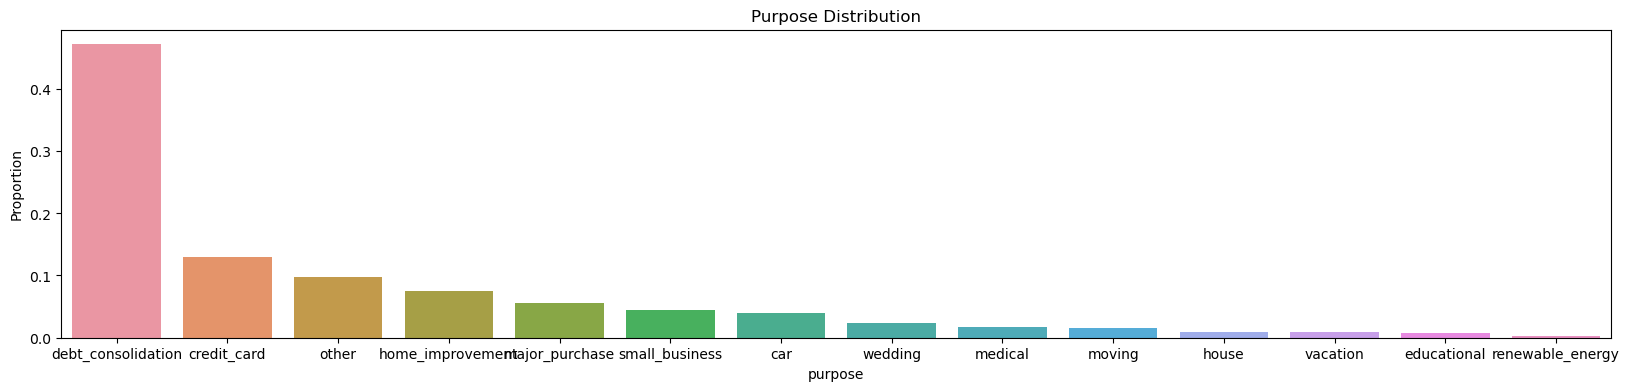

In [89]:
plt.figure(figsize=(20,4))
prob_df = data['purpose'].value_counts(normalize=True).reset_index()
sns.barplot(x='purpose', y='proportion', data=prob_df)
plt.xlabel('purpose')
plt.ylabel('Proportion')
plt.title('Purpose Distribution')
plt.show()

**Observations** <br>
- It appears that a greater number of individuals opted to take out loans for debt consolidation, while only a small minority chose to do so for renewable energy.

### Borrower's State (add_state)

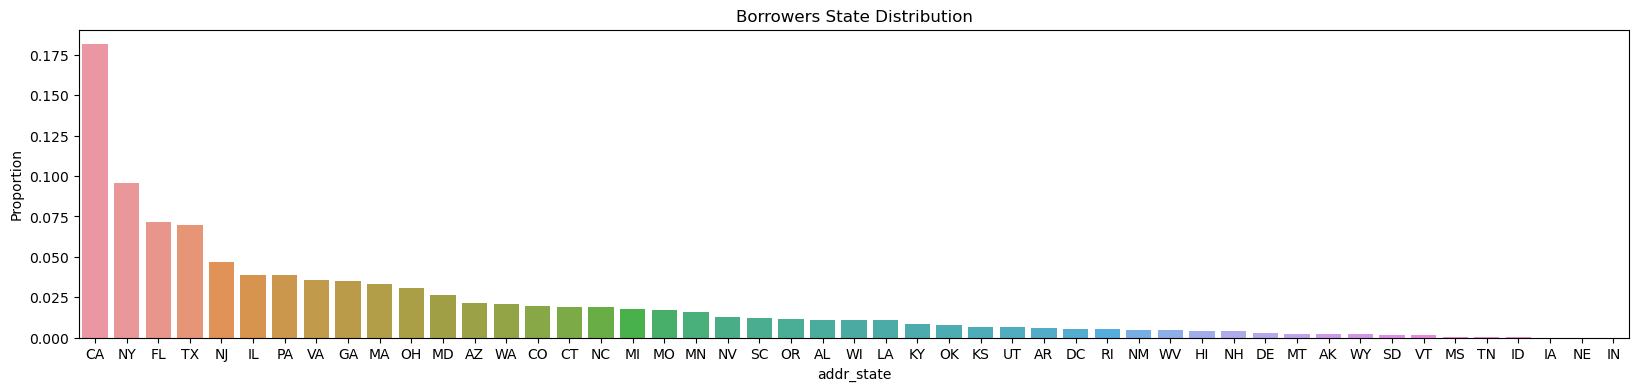

In [90]:
plt.figure(figsize=(20,4))
prob_df = data['addr_state'].value_counts(normalize=True).reset_index()
sns.barplot(x='addr_state', y='proportion', data=prob_df)
plt.xlabel('addr_state')
plt.ylabel('Proportion')
plt.title('Borrowers State Distribution')
plt.show()

**Observation** <br>
- Majority of the borrowers are from CA and NY

In [91]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status   issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-2011   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-2011  Charged Off             car    309xx   
2        Not Verified  Dec-2011   Fully Paid  small_business    606xx   
3     Source Verified  Dec-2011   Fully Paid           other    917xx   
5     Source Verified  Dec-2011   Fully Paid         wedding    852xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0         Jan-1985               1         3   
1         GA  1.00            0         Apr-1999               5         3   
2         IL  8.72            0         Nov-2001               2         2   
3         CA 20.00            0         Feb-1996               1        10   
5         AZ 11.20            0         Nov-2004               3         9   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_month  \
0           171.62                  0.00         2011           Dec   
1           119.66                  0.00         2011           Dec   
2           649.91                  0.00         2011           Dec   
3           357.48                  0.00         2011           Dec   
5           161.03                  0.00         2011           Dec   

   earliest_cr_line_year earliest_cr_line_month  
0                   1985                    Jan  
1                   1999                    Apr  
2                   2001                    Nov  
3                   1996                    Feb  
5                   2004                    Nov

# Segmented Univariate Analysis

### Loan Amount

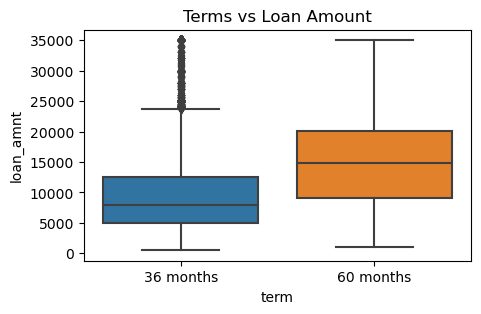

In [92]:
plt.figure(figsize=(5,3))
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.show()

**Observation** <br>
- Greater the term of the loan, greater amount.

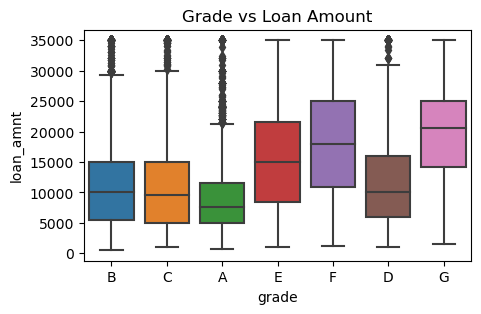

In [93]:
plt.figure(figsize=(5,3))
sns.boxplot(x='grade', y=data.loan_amnt, data=data)
plt.title('Grade vs Loan Amount')
plt.show()

**Observation** <br>
- The majority of loan amount have been taken by employees graded as 'E' and 'F'.

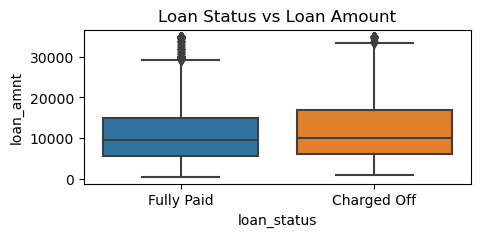

In [94]:
plt.figure(figsize=(5,2))
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('Loan Status vs Loan Amount')
plt.show()

**Observation** <br>
- Charged off loan are higer than fully paid

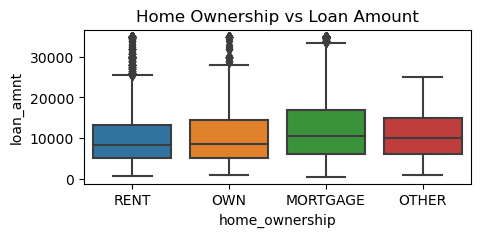

In [95]:
plt.figure(figsize=(5,2))
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('Home Ownership vs Loan Amount')
plt.show()

**Observation** <br>
- Mortgage loan are higher than other loans and median is higher than other loans as well.

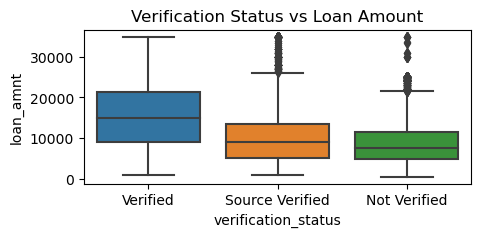

In [96]:
plt.figure(figsize=(5,2))
sns.boxplot(x='verification_status', y=data.loan_amnt, data=data)
plt.title('Verification Status vs Loan Amount')
plt.show()

**Observation** <br>
- Most of borrowers are verified

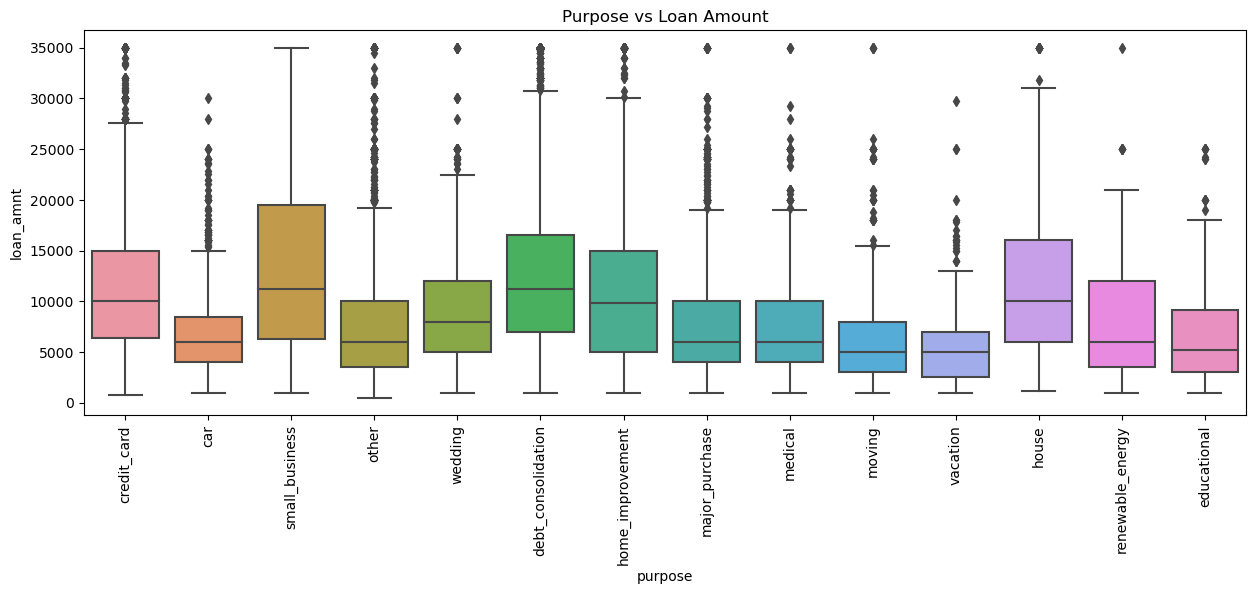

In [97]:
plt.figure(figsize=(15,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan Amount')
plt.show()

**Observation** <br>
- More loans are for small_business

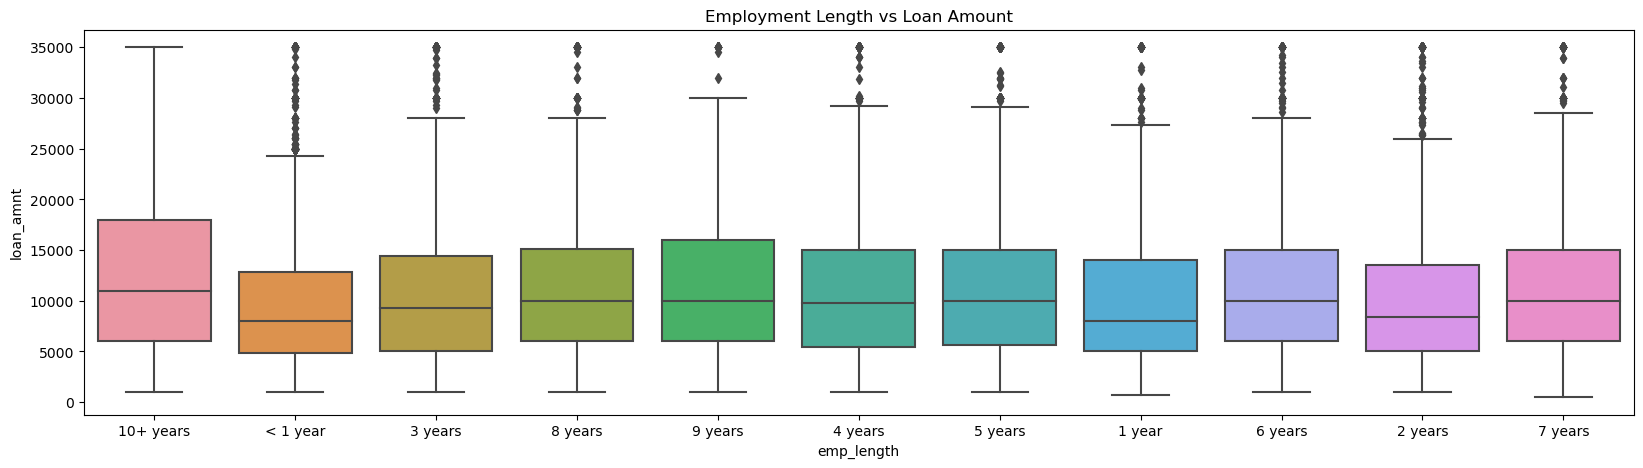

In [98]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('Employment Length vs Loan Amount')
plt.show()

**Observation** <br>
- Mor borrowers are from 10+ years and least is less 1 year

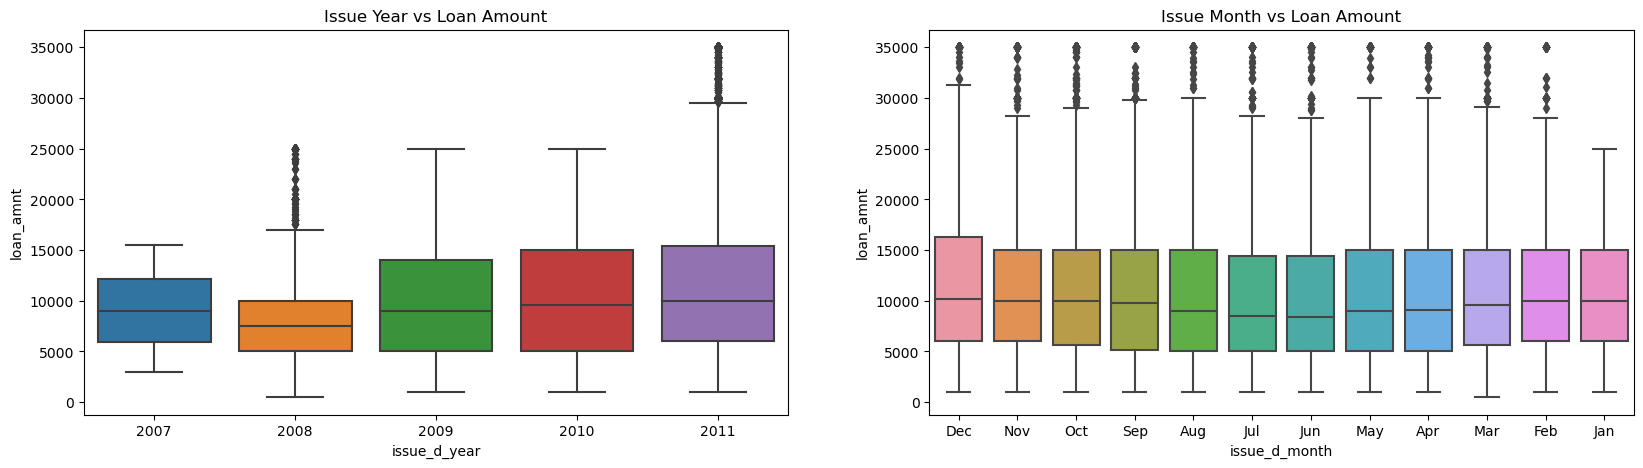

In [99]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issue Year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issue Month vs Loan Amount')
plt.show()

**Observations** <br>

- There were a few loan borrowers who obtained higher loan amounts in both 2008 and 2011, and these instances have been identified as outliers in the data.
- In all the months, loan borrowers have availed nearly identical amounts, with the exception of December, where individuals have obtained larger sums due to a significantly higher distribution above the median.

### Interest Rate

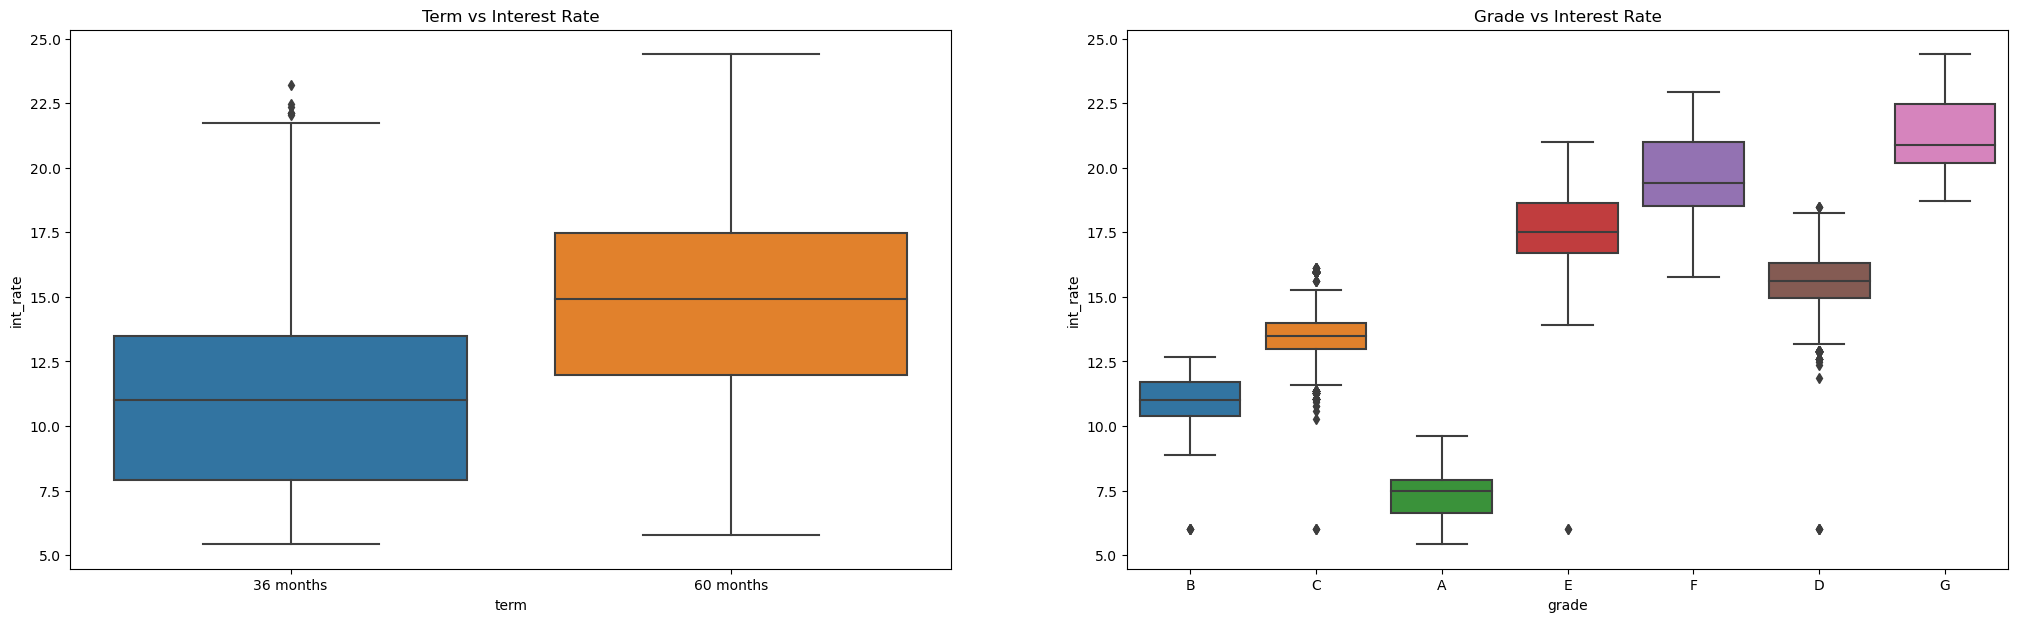

In [100]:
plt.figure(figsize=(25,7))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
sns.boxplot(x='grade', y=data.int_rate, order = (data.grade.unique()).sort(), data=data)
plt.show()

**Observation** <br>
- The interest rates for loans with longer tenures are higher.
- The lower grades has higher interest reate

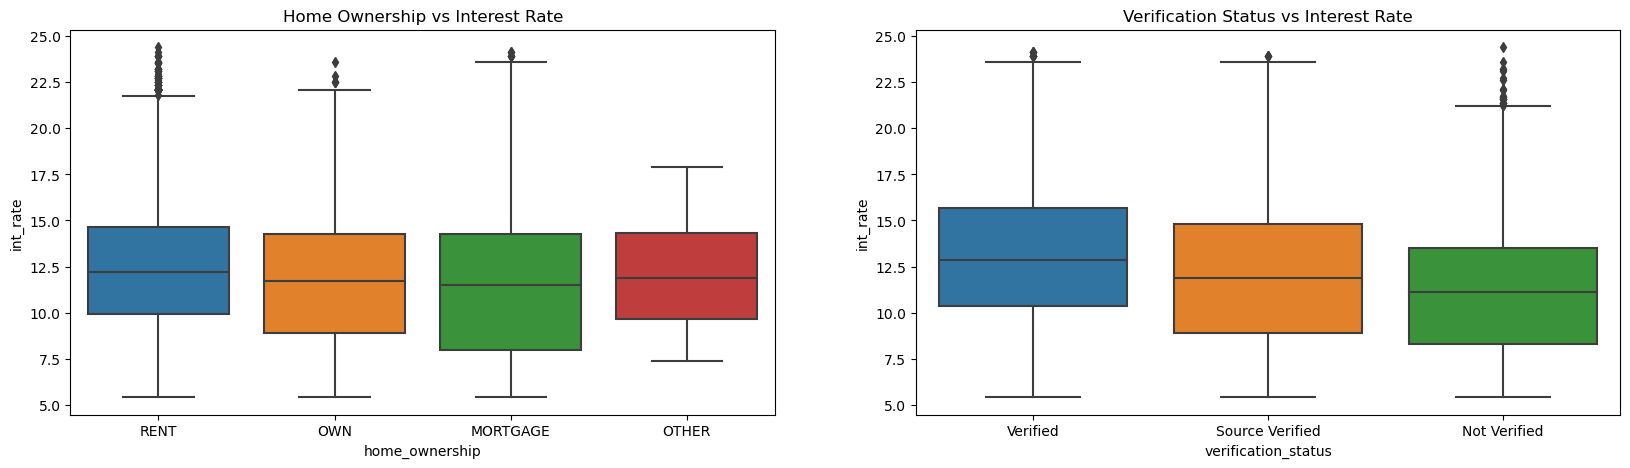

In [101]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('Home Ownership vs Interest Rate')
plt.subplot(122)
plt.title('Verification Status vs Interest Rate')
sns.boxplot(x='verification_status', y=data.int_rate, order = (data.verification_status.unique()).sort(), data=data)
plt.show()

**Observations** <br>
- Non-verified borrowers receive lower interest rates in comparison to verified and source-verified borrowers.
- Borrowers with Own and Mortgage got loans with less interest rates as the security will be there.

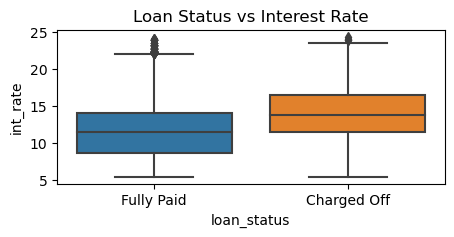

In [102]:
plt.figure(figsize=(5,2))
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('Loan Status vs Interest Rate')
plt.show()

**Observations** <br>
- It indicates that the higher the interest rate, the greater the chance of loan default.

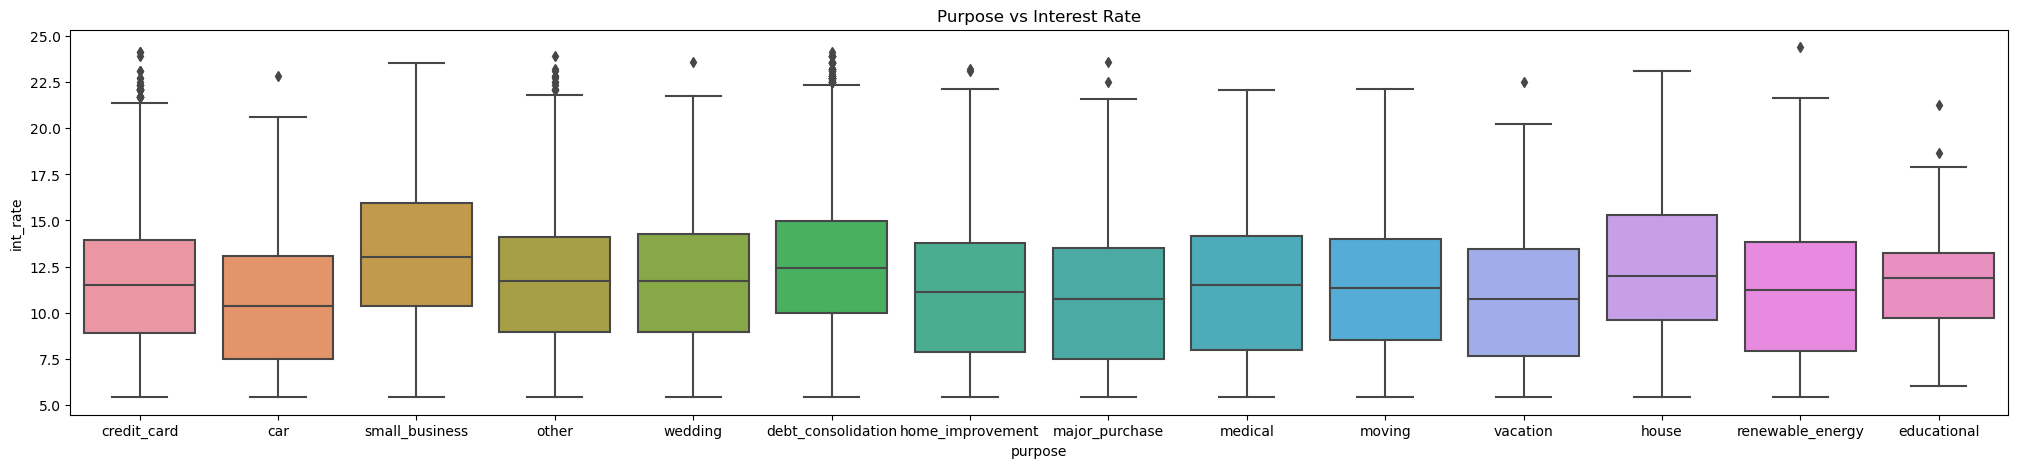

In [103]:
plt.figure(figsize=(25,5))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.title('Purpose vs Interest Rate')
plt.show()

**Observation** <br>
- Small business, house, debt has more intererst rate than others

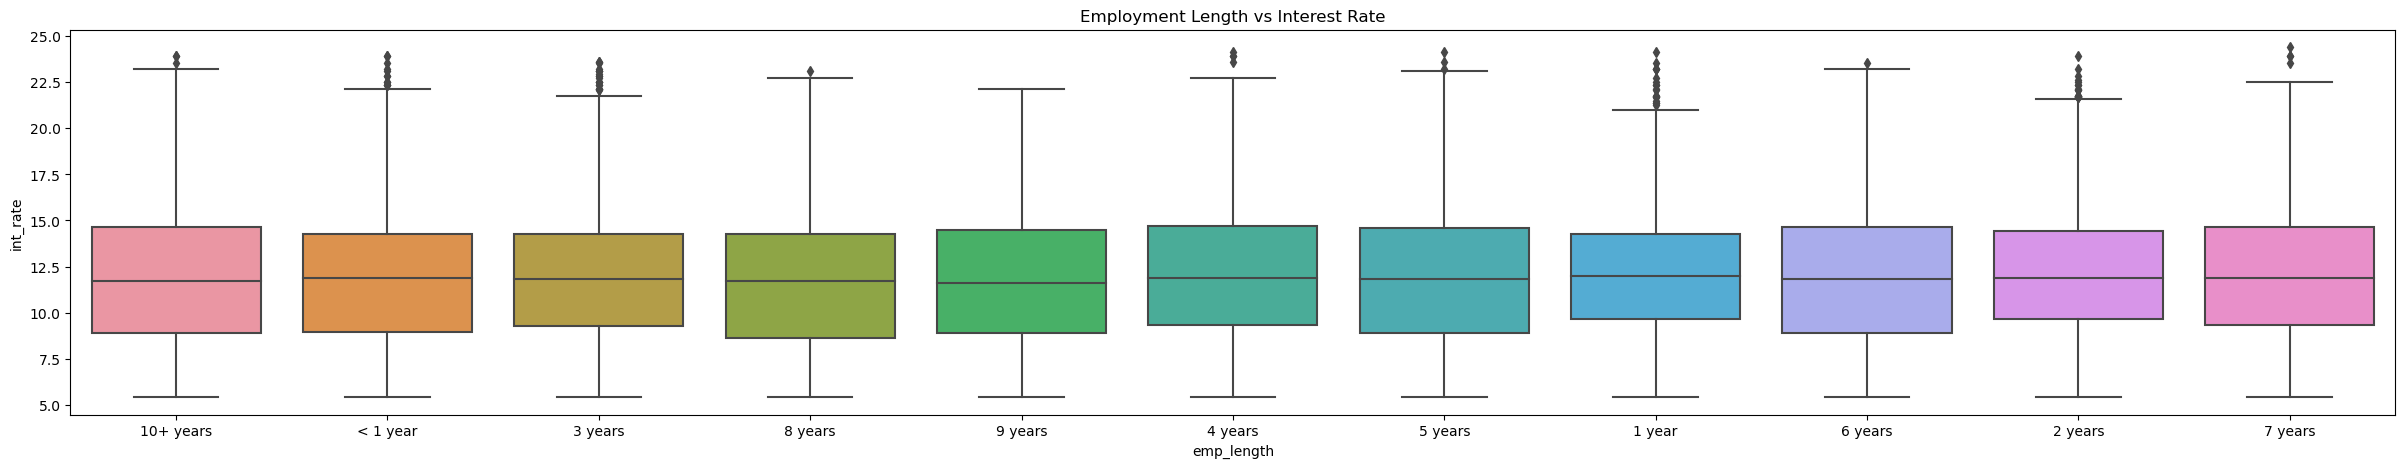

In [104]:
plt.figure(figsize=(30,5))
sns.boxplot(x='emp_length', y=data.int_rate, data=data)
plt.title('Employment Length vs Interest Rate')
plt.show()

**Observation** <br>
- There is not much relation between employment length and interest rate

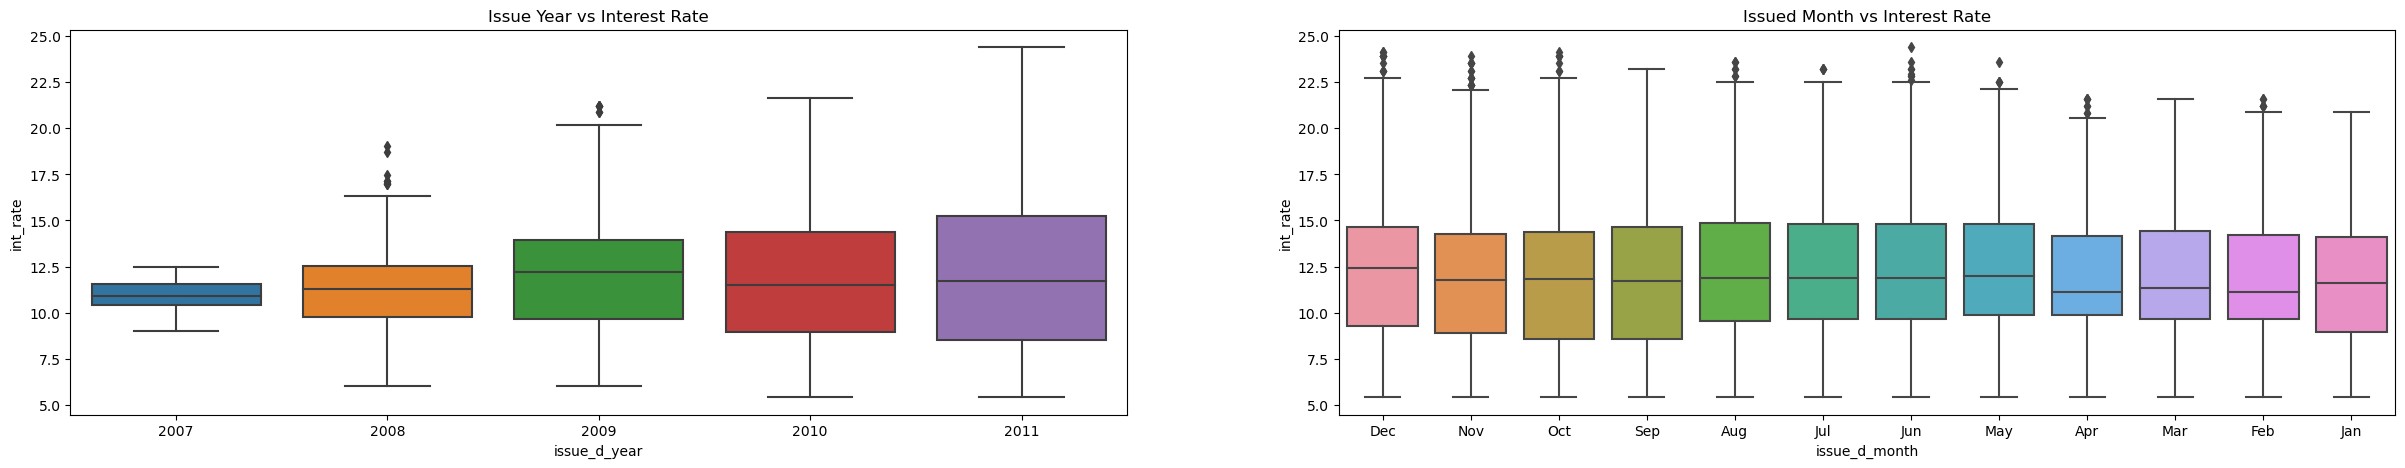

In [105]:
plt.figure(figsize=(30,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.int_rate, data=data)
plt.title('Issue Year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.int_rate, data=data)
plt.title('Issued Month vs Interest Rate')
plt.show()

**Observations**:<br>
* The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.  
* Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.<br>
* Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

### Annual Income

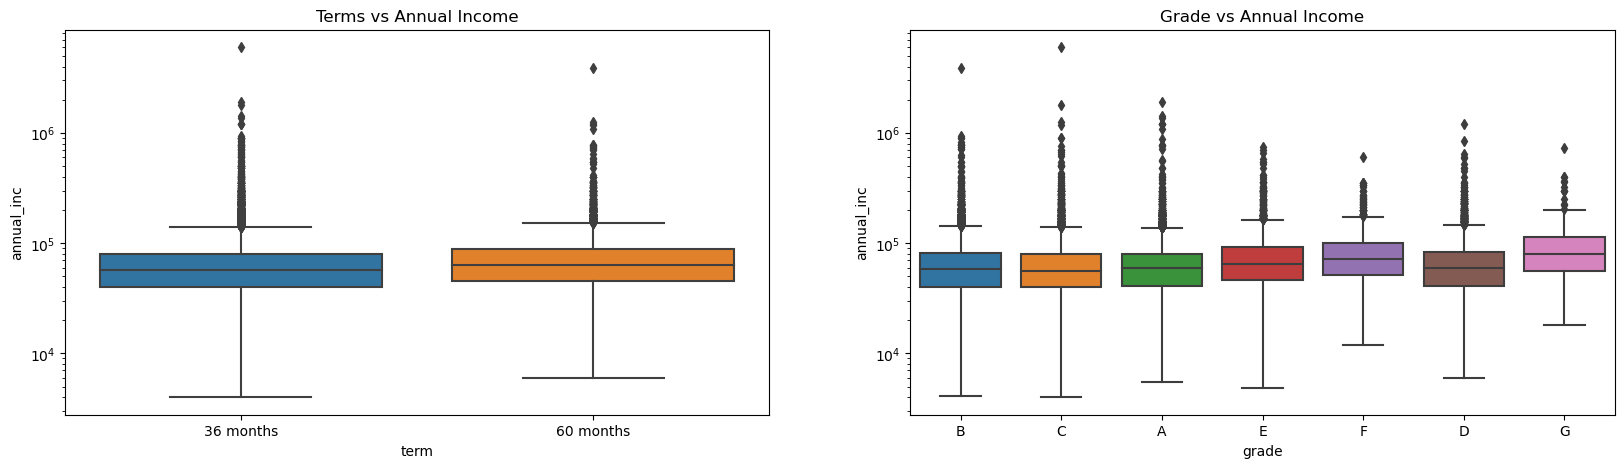

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs Annual Income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs Annual Income')
sns.boxplot(x='grade', y=data.annual_inc, data=data)
plt.yscale('log')
plt.show()

**Observation** <br>
- Lower grades tend to have a higher annual income compared to other grades.

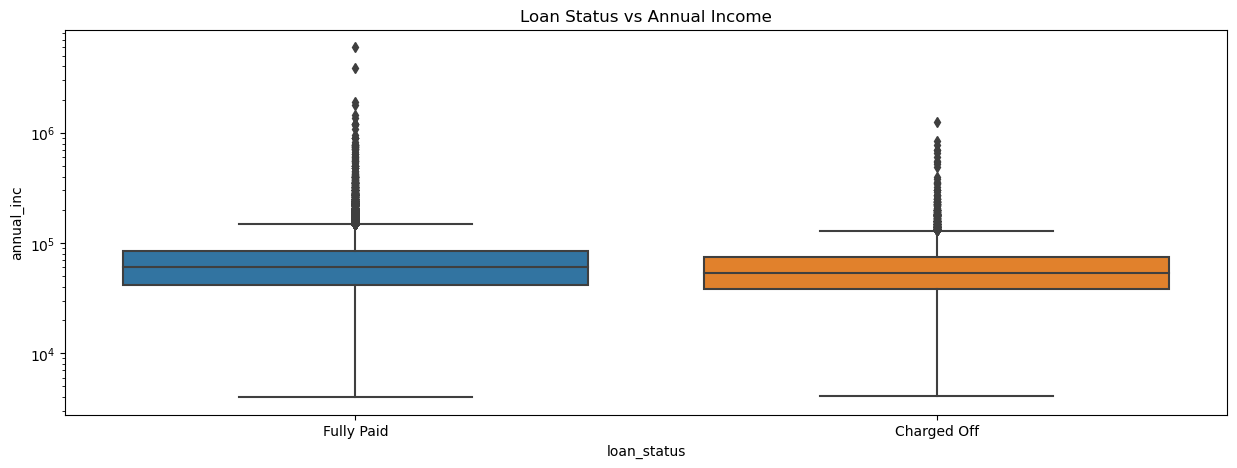

In [107]:
plt.figure(figsize=(15,5))
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('Loan Status vs Annual Income')
plt.yscale('log')

**Observation** <br>
- Most borrowers with higher annual incomes have "fully paid" off their loans.

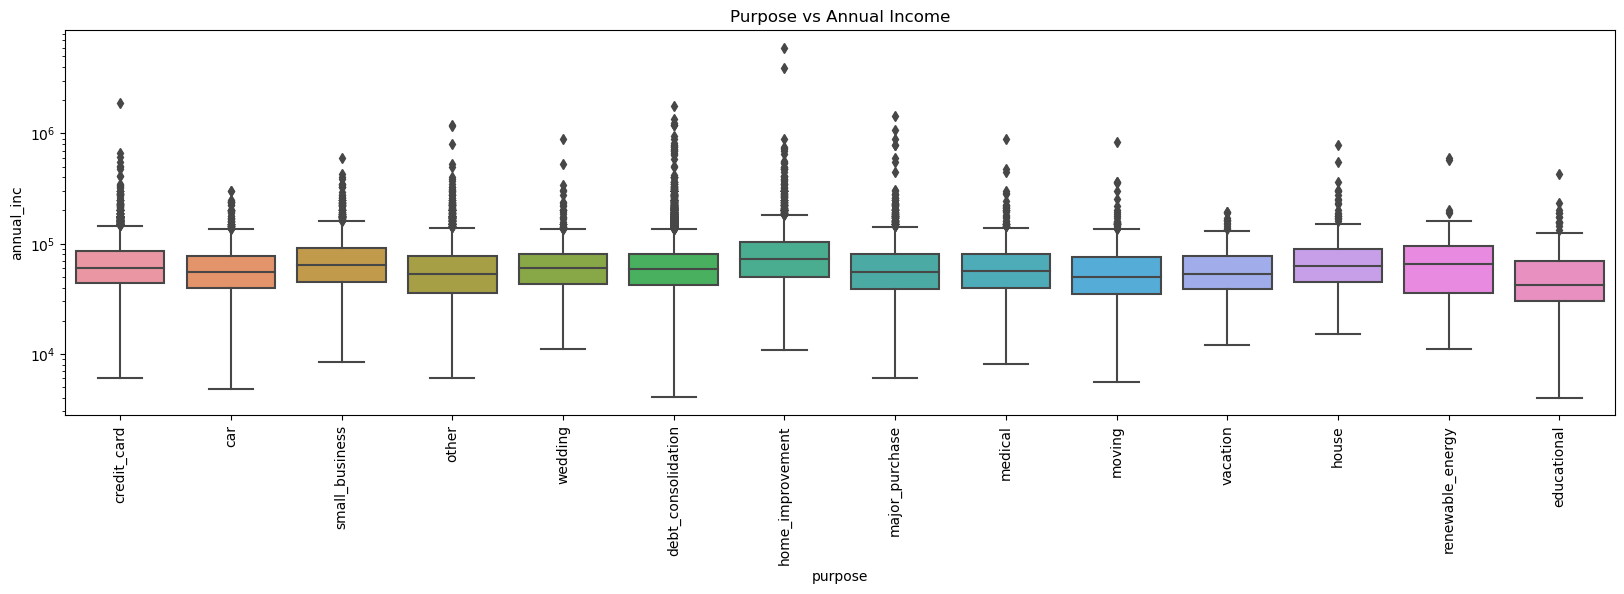

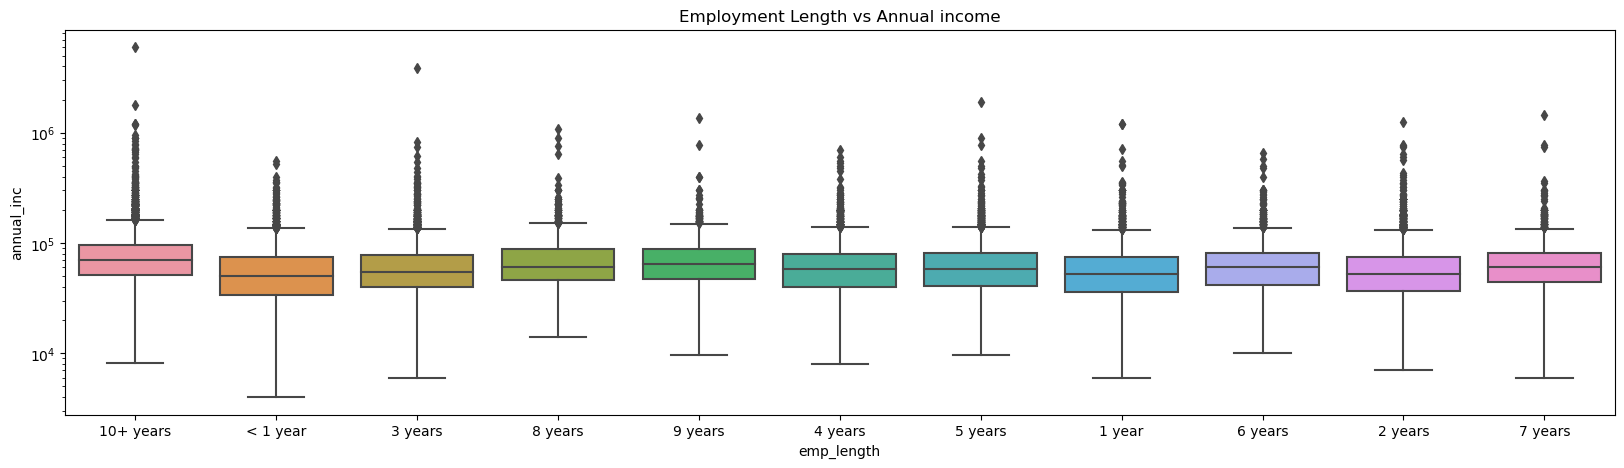

In [108]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('Purpose vs Annual Income')
plt.yscale('log')


plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employment Length vs Annual income')
plt.yscale('log')


**Observations** <br>
- "small businesses", "home improvements" and "renewable energy" has higher annual income declared by the borrower when requesting a loan.
- More employment length indicates more annual income

### DTI (Debt To Income Ratio)

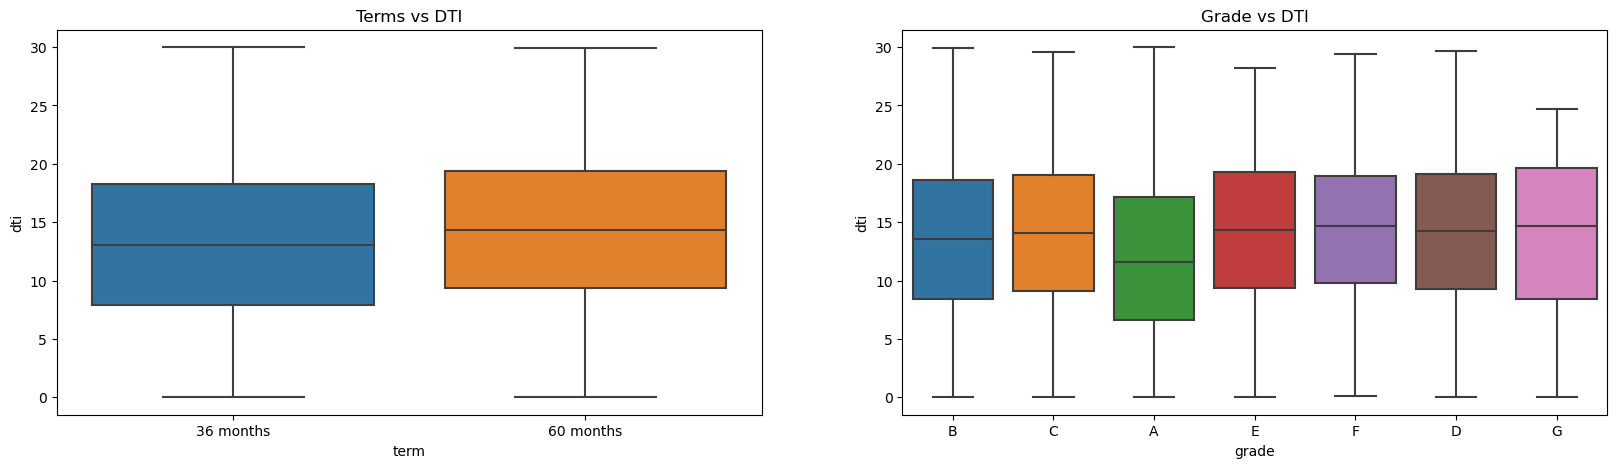

In [109]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs DTI')
plt.subplot(122)
plt.title('Grade vs DTI')
sns.boxplot(x='grade', y=data.dti, data=data)
plt.show()

**Observation** <br>
- The DTI is relatively high for individuals with longer tenure. 
- A Grade borrowers have a lower debt-to-income ratio (DTI) compared to borrowers in other grades.

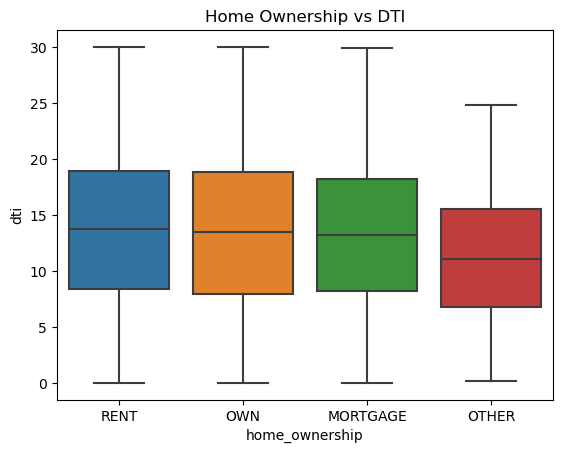

In [110]:
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('Home Ownership vs DTI')
plt.show()

**Observation** <br>
- Borrowers having home ownership "OTHER" have less DTI than others

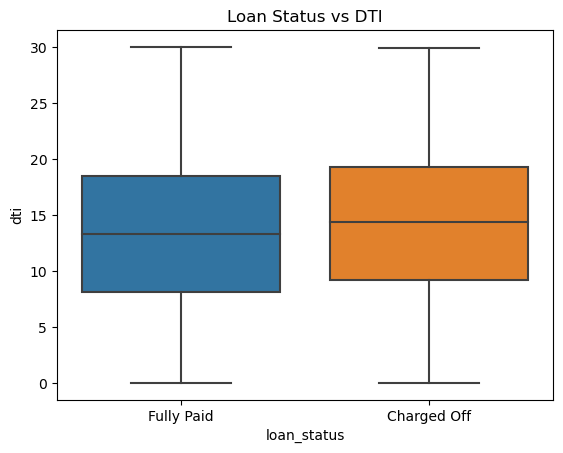

In [111]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('Loan Status vs DTI')
plt.show()

**Observation** <br>
- Borrowers who have a high debt-to-income ratio (DTI) are slightly more likely to default on their loans.

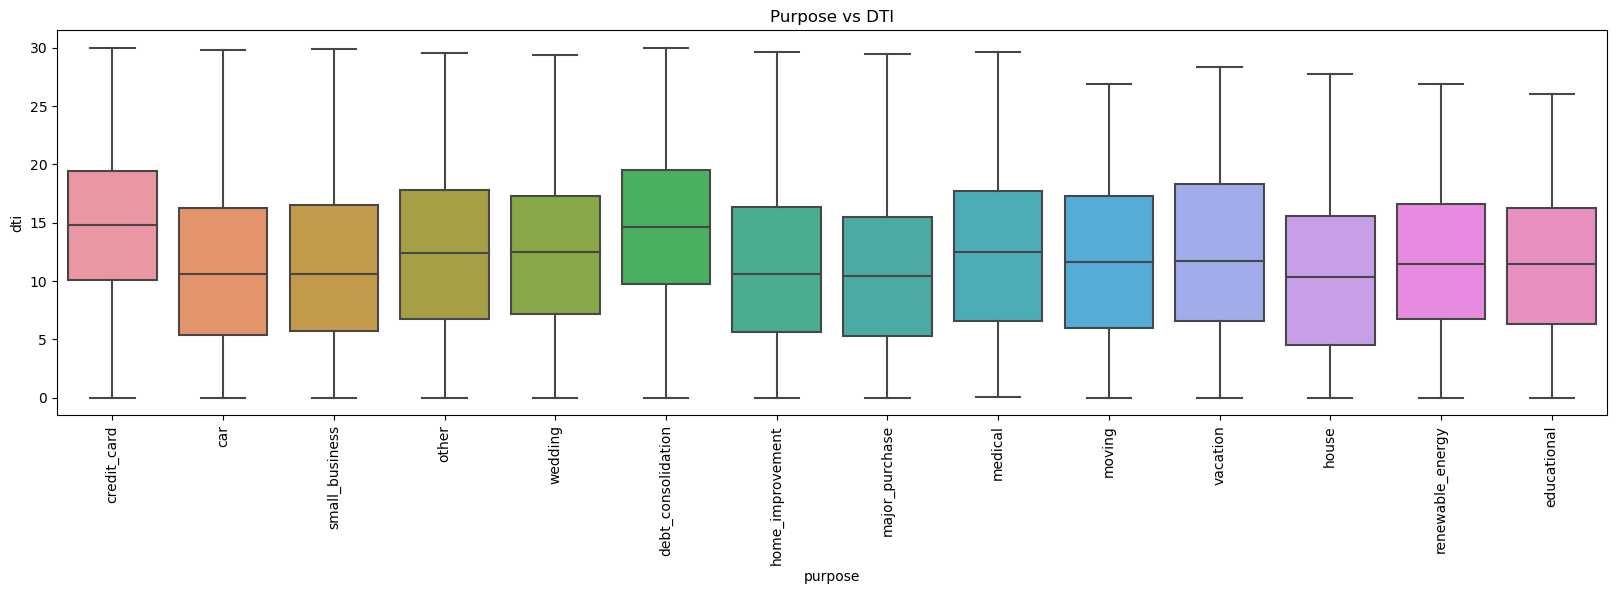

In [112]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('Purpose vs DTI')
plt.show()

**Observation** <br>
- Borrowers who have taken loan for debt consolidation have high DTI.

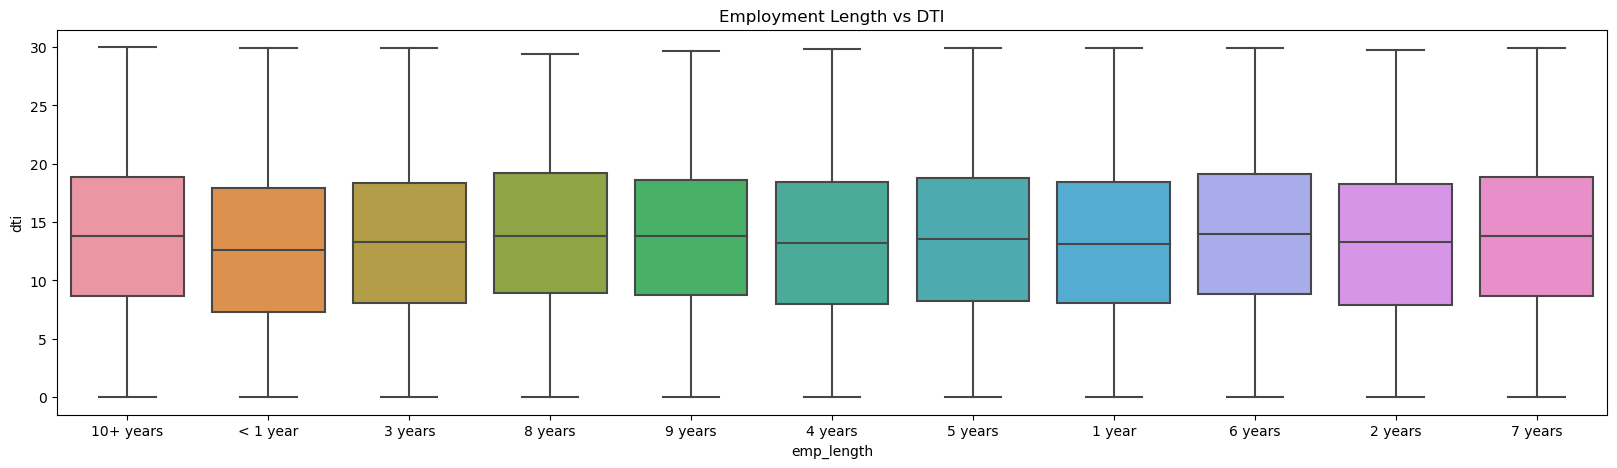

In [113]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.dti, data=data)
plt.title('Employment Length vs DTI')
plt.show()

**Observation** <br>
- The DTI is quite similar for borrowers regardless of their employment tenure.

### Public Record  Bankruptcies (pub_rec_bankruptcies)

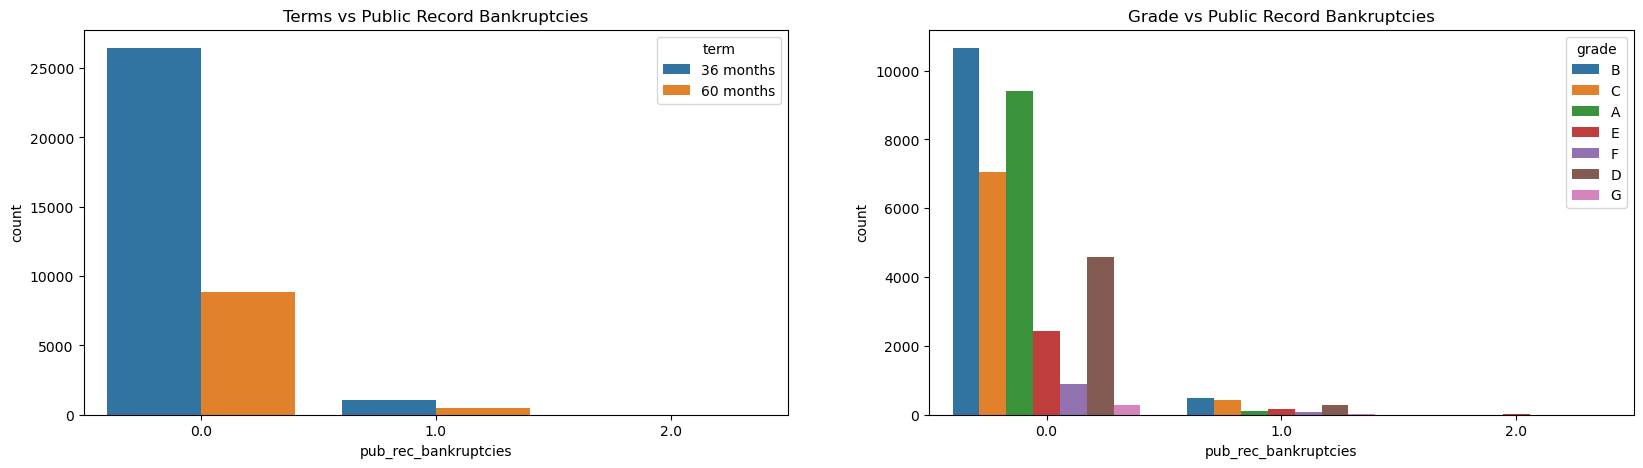

In [114]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(x = 'pub_rec_bankruptcies', hue='term', data=data)
plt.title('Terms vs Public Record Bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public Record Bankruptcies')
sns.countplot(x = 'pub_rec_bankruptcies', hue='grade', data=data)
plt.show()

**Observation** <br>
- There are a few loan has been scanctioned with bankrupty record

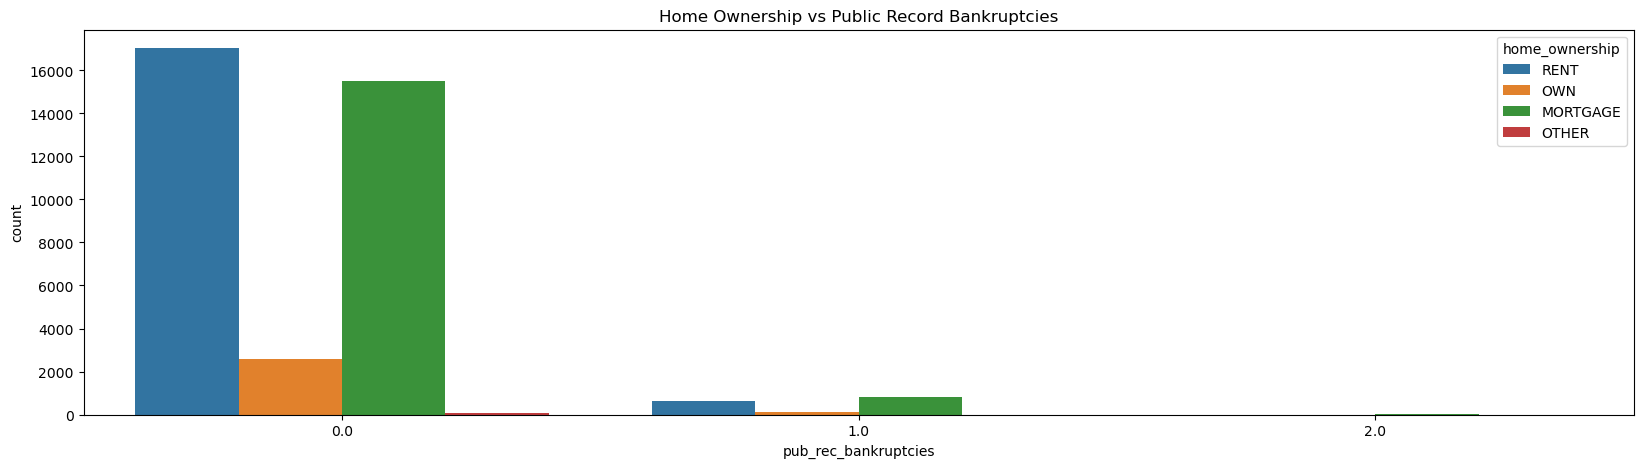

In [115]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'pub_rec_bankruptcies', hue='home_ownership', data=data)
plt.title('Home Ownership vs Public Record Bankruptcies')
plt.show()

**Observation**
- There are a few loan has been scanctioned for customer having 'mortgage' and has public bankruptcy record.

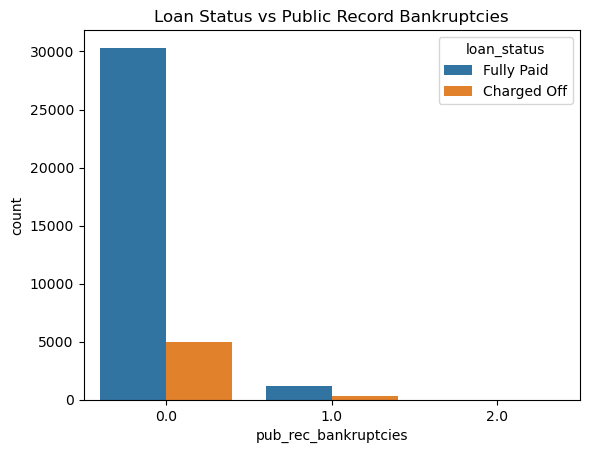

In [116]:
sns.countplot(x = 'pub_rec_bankruptcies', hue='loan_status', data=data)
plt.title('Loan Status vs Public Record Bankruptcies')
plt.show()

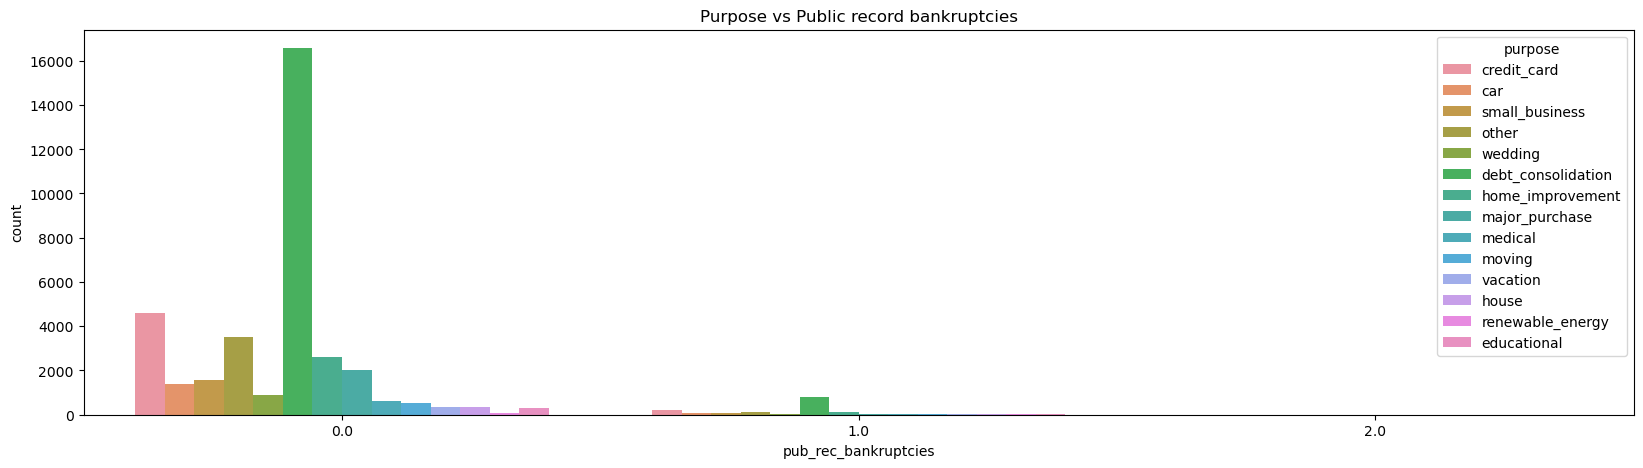

In [117]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'pub_rec_bankruptcies', hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')
plt.show()

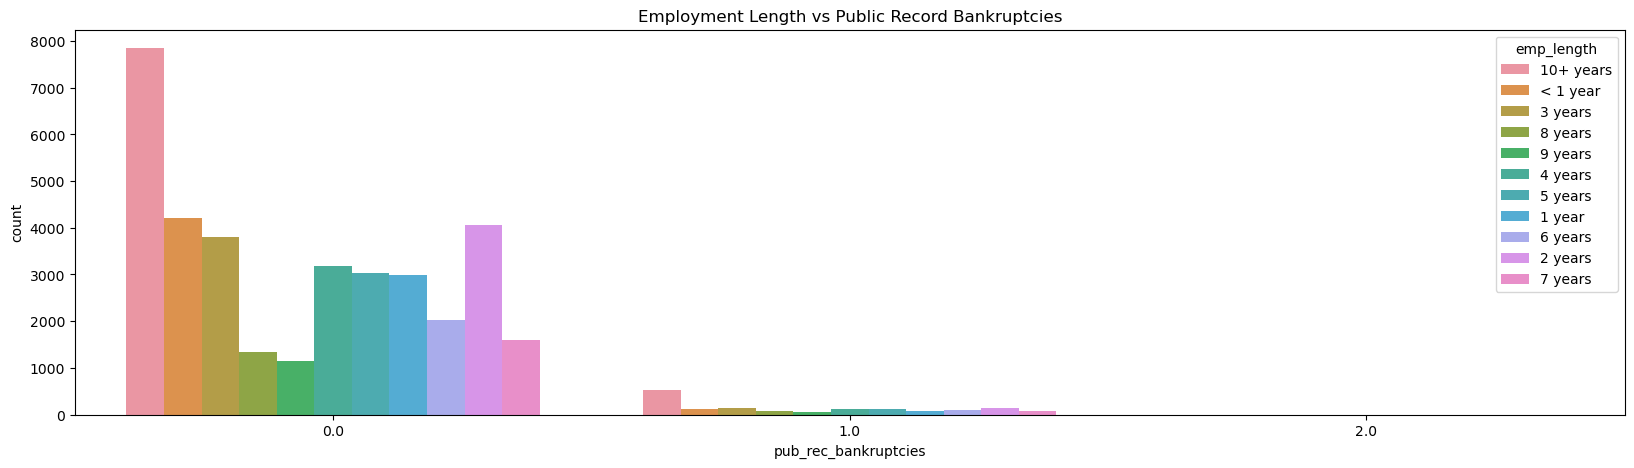

In [118]:
plt.figure(figsize=(20,5))
sns.countplot(x ='pub_rec_bankruptcies', hue='emp_length', data=data)
plt.title('Employment Length vs Public Record Bankruptcies')
plt.show()

### Inquiry In Last 6 Months

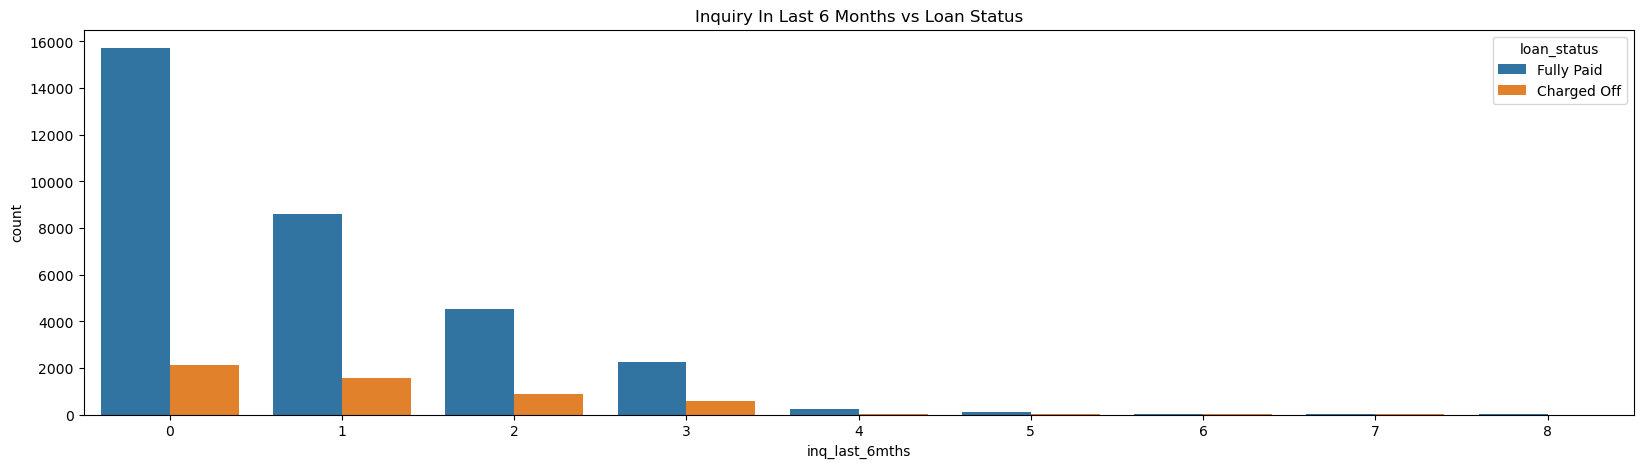

In [119]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'inq_last_6mths', hue='loan_status', data=data)
plt.title('Inquiry In Last 6 Months vs Loan Status')
plt.show()

# Bivariate Analysis

### Term

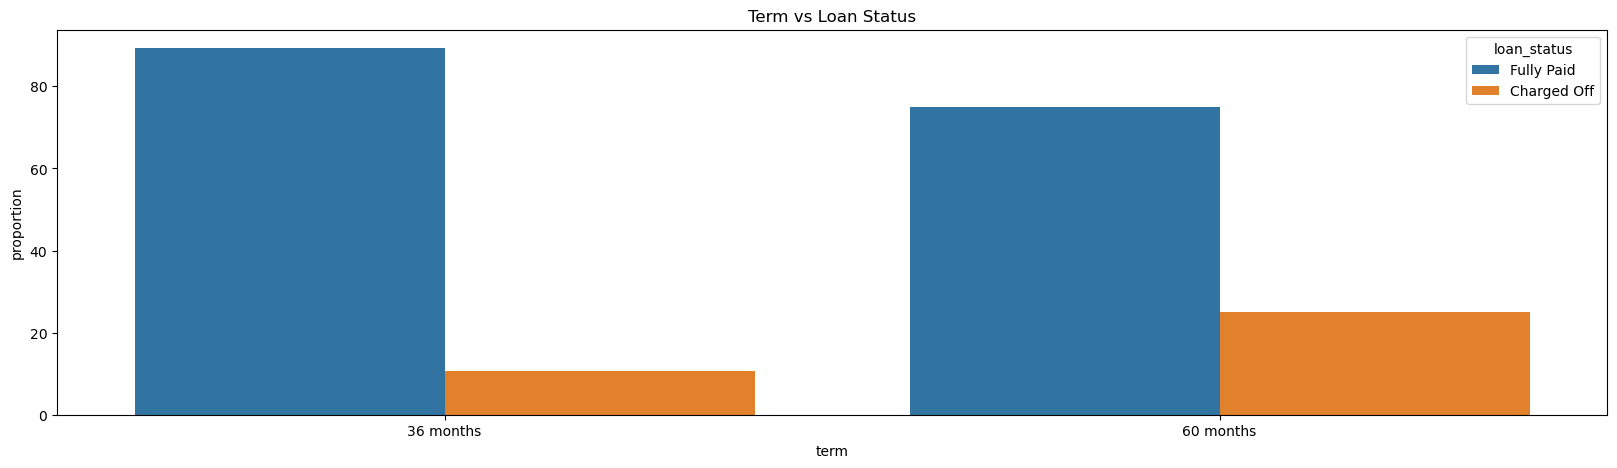

In [120]:
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term')['id'].transform(lambda x: (x/sum(x)*100))
plt.figure(figsize=(20,5))
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Term vs Loan Status')
plt.show()

**Observation** <br>

- It appears that there is a higher proportion of borrowers who have defaulted on their loans in the 60-month term compared to the 36-month term. Additionally, the rate of loans being fully paid is higher in the 36-month tenure.

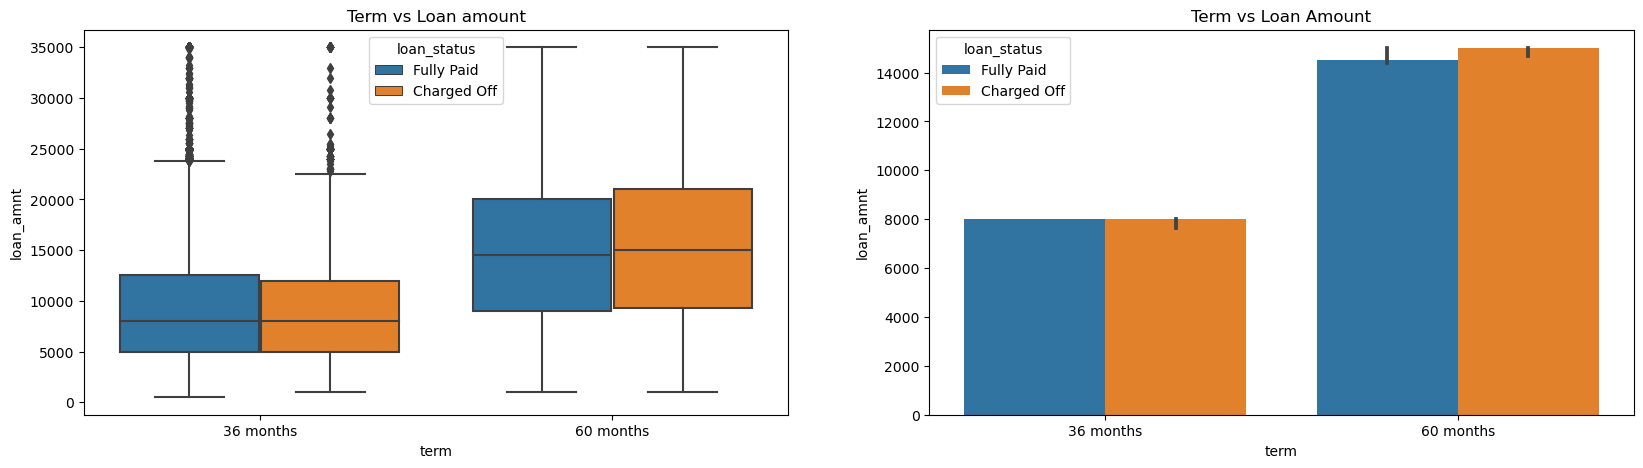

In [121]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs Loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Loan Amount')
plt.show()

**Observations** <br>
- The distribution of borrowers is evenly spread between default and non-default for both 36 and 60-month tenures.
- Loan Defaulter in both 36 and 60 months are not determined by the loan amount.

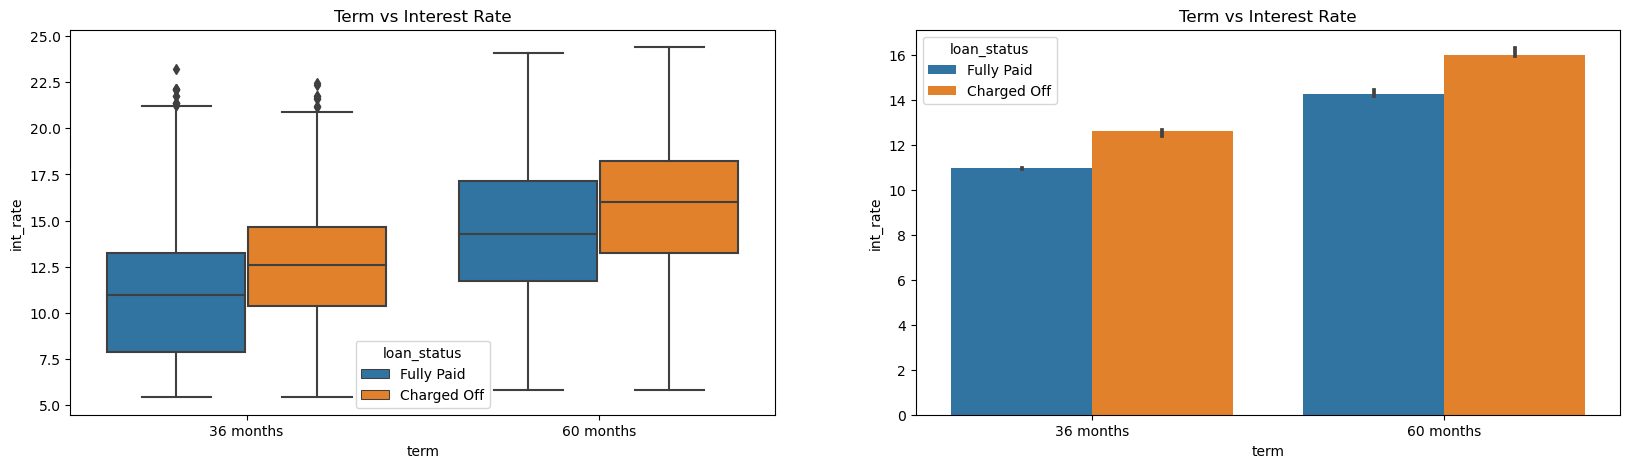

In [122]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest Rate')
plt.show()

**Observation** <br>
- The defaulter rate is higher for both 36 and 60 months tenure when the interest rates are increased.

### Grade

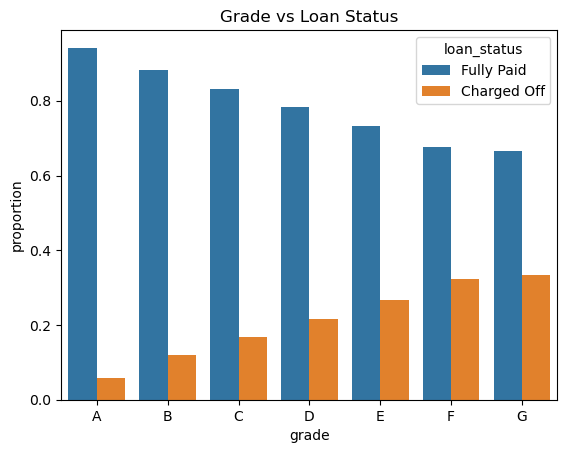

In [124]:
grade = (data.grade.unique()).sort()
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('grade')['id'].transform(lambda x: x/sum(x))
sns.barplot(x='grade', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan Status')
plt.show()

**Observation** <br>
- The graph above clearly indicates that as the grades decrease, the number of charged off cases increases.

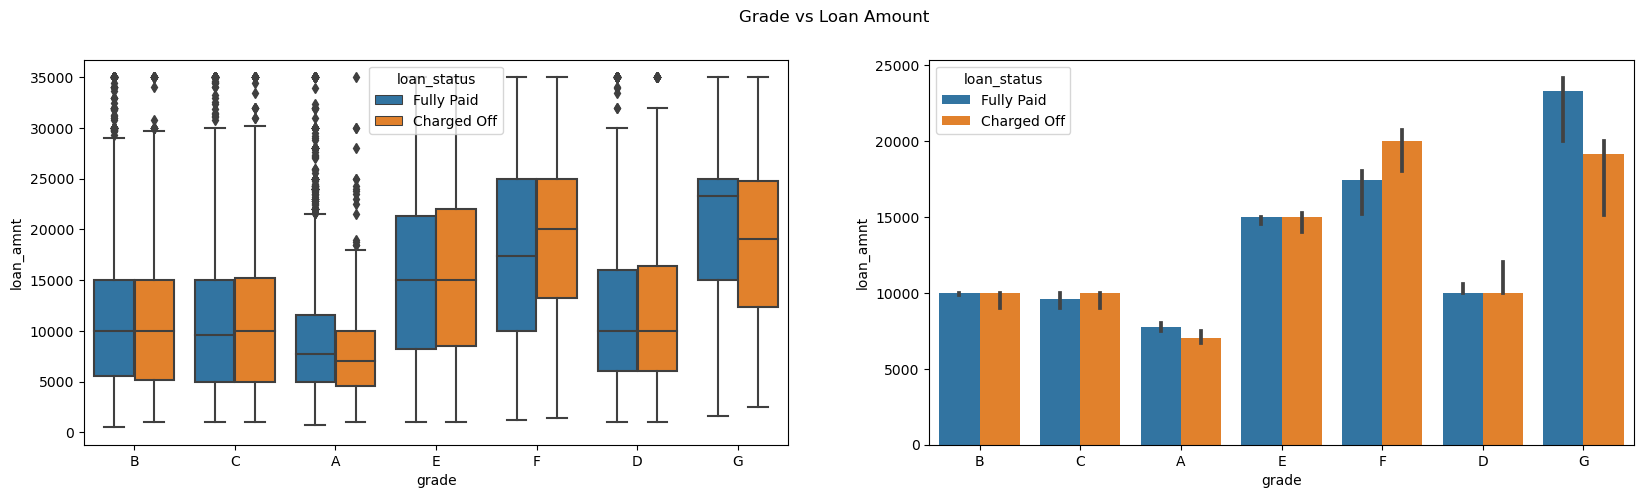

In [125]:
grade = (data.grade.unique()).sort()
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order=grade)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order=grade)
plt.suptitle('Grade vs Loan Amount')
plt.show()

**Observation** <br>
- People with lower grades tend to take out larger loans and are also more likely to default on them

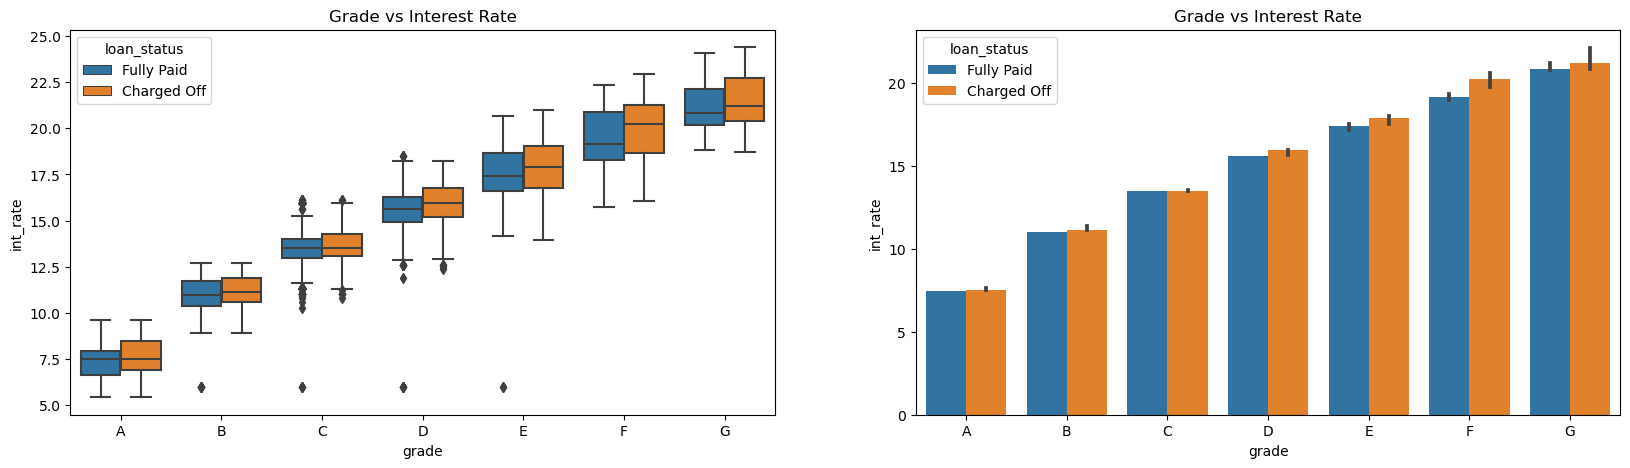

In [126]:
grade_unique = data.grade.unique()
grade_unique.sort()
grade_unique

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order=grade_unique)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, estimator=np.median, order=grade_unique)
plt.title('Grade vs Interest Rate')
plt.show()

**Observation** <br>
- As the grade decreases, the interest rate gradually goes up, making them more and more likely to default on the loan.

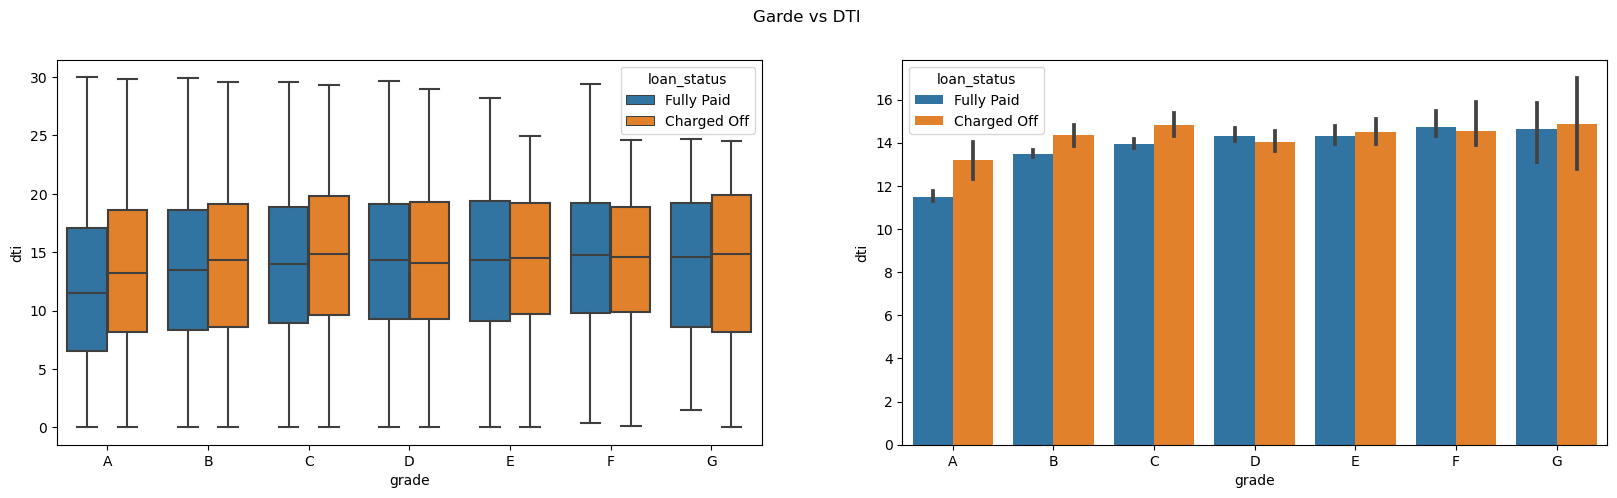

In [127]:
grade_unique = data.grade.unique()
grade_unique.sort()
grade_unique

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_unique)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_unique)
plt.suptitle('Garde vs DTI')
plt.show()

**Observation** <br>
- No interesting observation found

### Employment Length

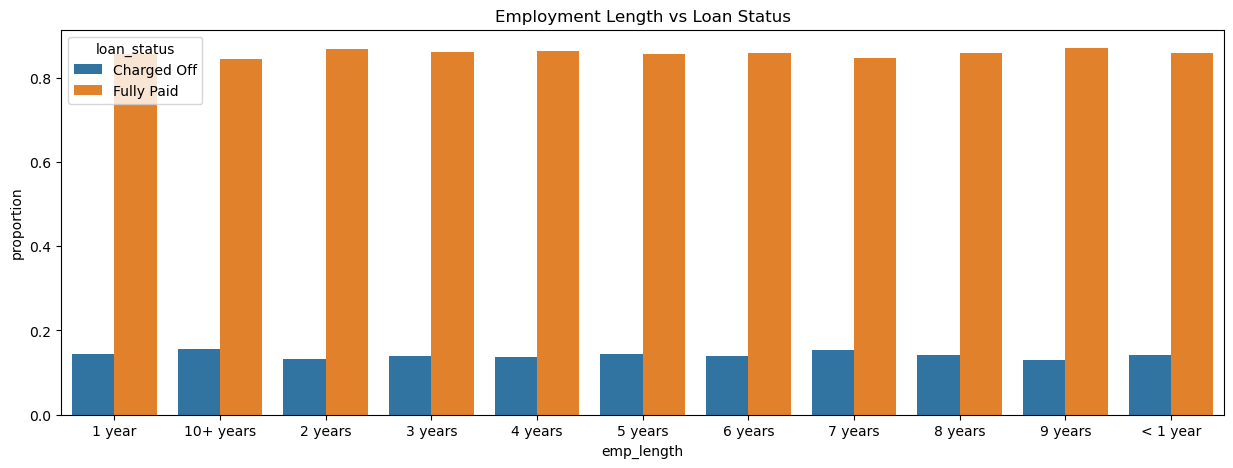

In [128]:
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('emp_length')['id'].transform(lambda x: x/sum(x))
plt.figure(figsize=(15,5))
sns.barplot(x='emp_length', y='proportion', hue='loan_status', data=df)
plt.title('Employment Length vs Loan Status')
plt.show()

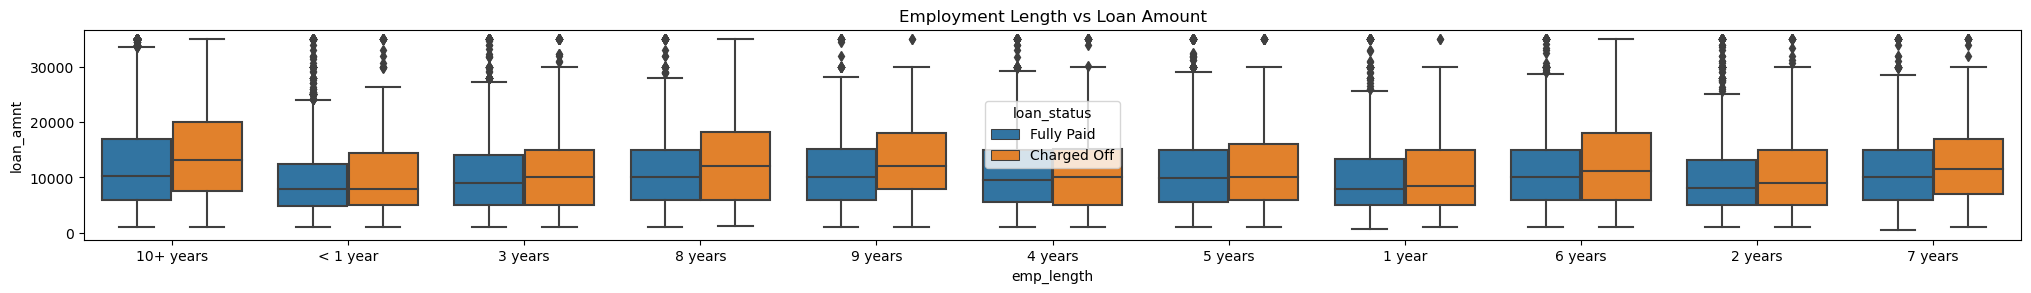

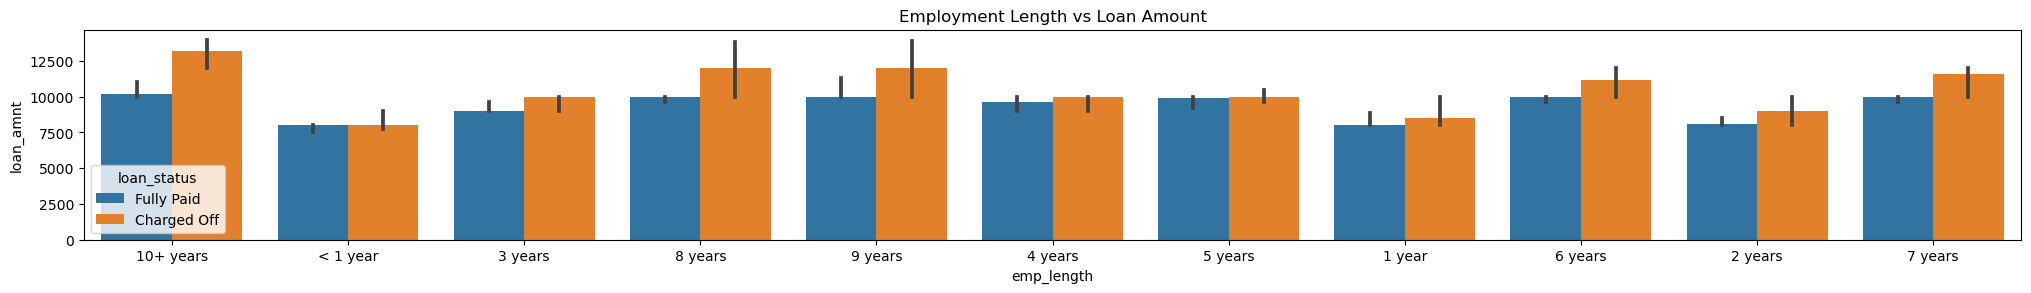

In [129]:
plt.figure(figsize=(25,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.title('Employment Length vs Loan Amount')

plt.figure(figsize=(25,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Employment Length vs Loan Amount')
plt.show()

**Observation** <br>

- Borrowers who have longer employment histories and have taken out larger loan amounts tend to have higher default rates.


### Home Ownership

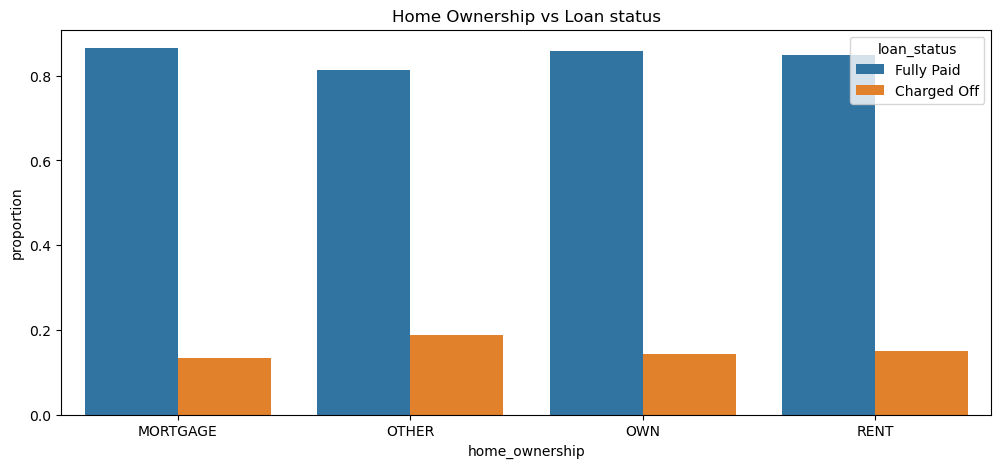

In [130]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('home_ownership')['id'].transform(lambda x: x/sum(x))
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')
plt.show()

**Observation** <br>
- There is a slightly elevated rate of defaults recorded in the other home ownership category.

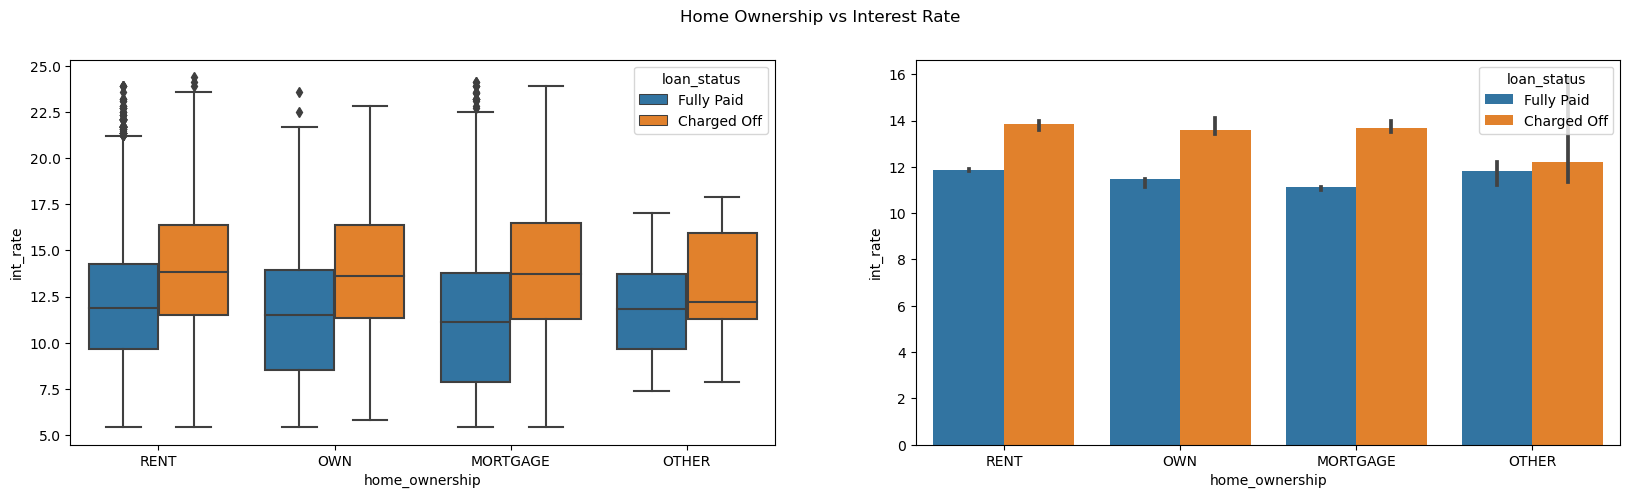

In [131]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Home Ownership vs Interest Rate')
plt.show()

**Observation** <br>
- Interest high, loan defaults are high irrespective of home ownership

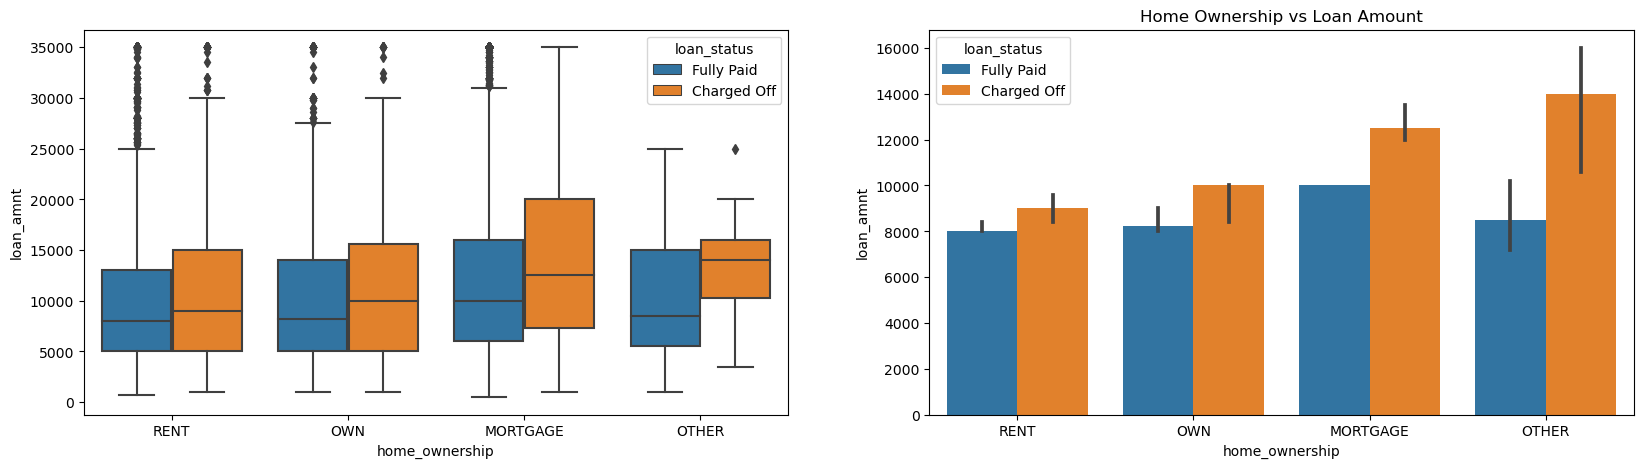

In [132]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Home Ownership vs Loan Amount')
plt.show()

**Observation** <br>
- Borrowers who borrowed larger loan amounts had a higher rate of default compared to others.

### Address State

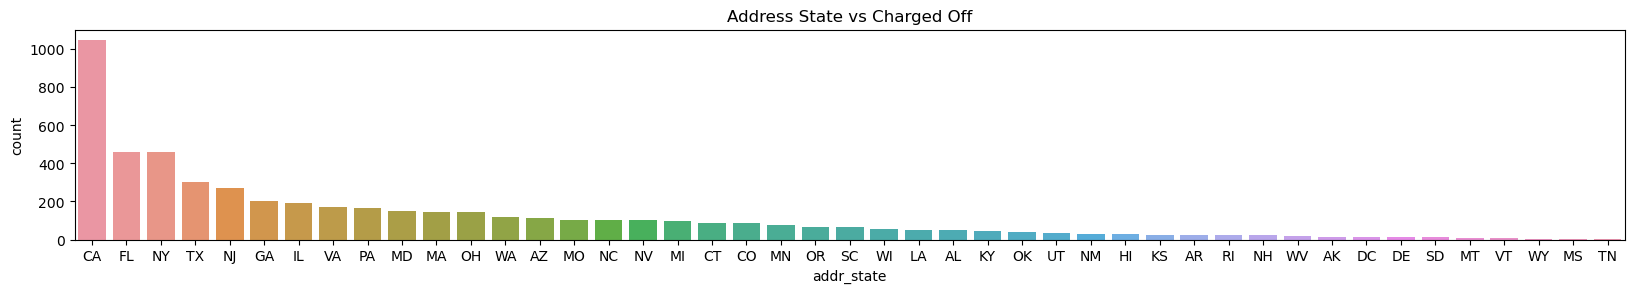

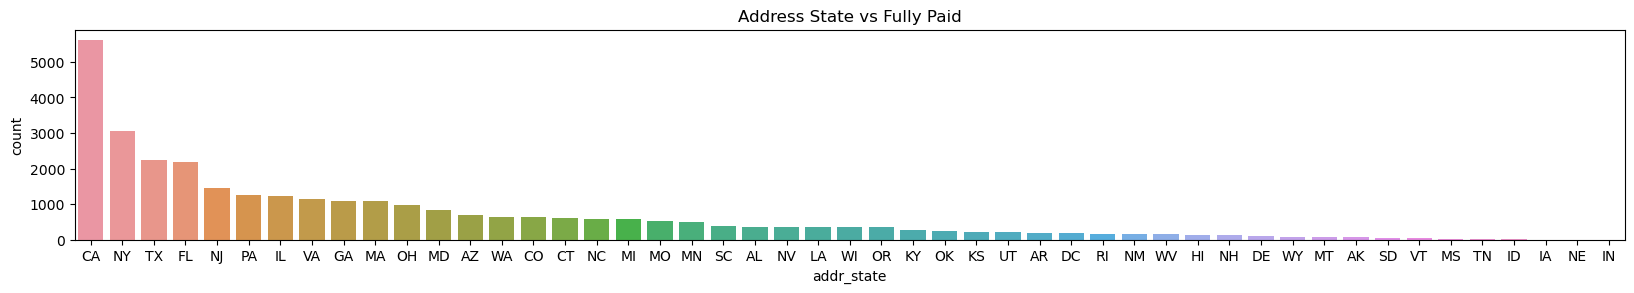

In [133]:
charged_off = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off, order=charged_off.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

ffully_paid = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=ffully_paid, order=ffully_paid.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

**Observation** <br>
- There were higher instances of borrowers defaulting in CA, FL, and NY states.

### Verfication Status

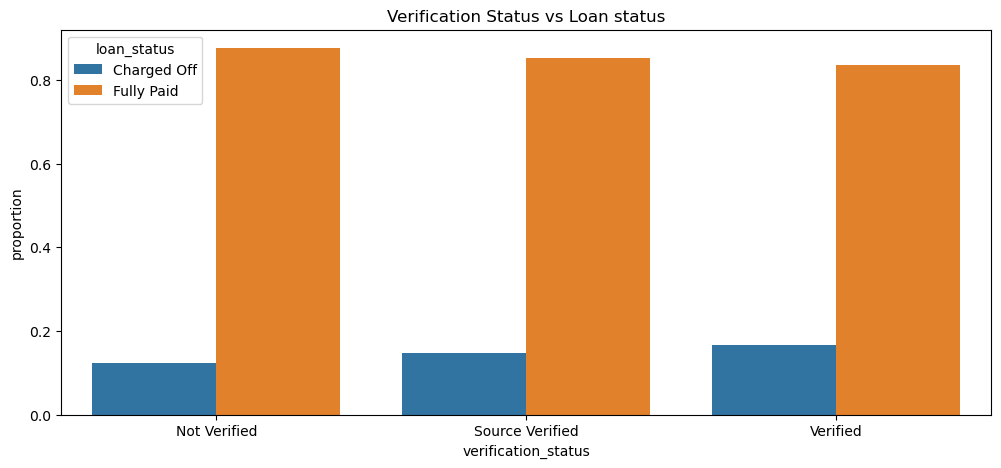

In [196]:
loan = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
loan['proportion'] = loan.groupby('verification_status')['id'].transform(lambda x: x/sum(x))
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='proportion', hue='loan_status', data=loan)
plt.title('Verification Status vs Loan status')
plt.show()

**Observation** <br>
- No big changes in loan defaults across all verification status

In [197]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status   issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-2011   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-2011  Charged Off             car    309xx   
2        Not Verified  Dec-2011   Fully Paid  small_business    606xx   
3     Source Verified  Dec-2011   Fully Paid           other    917xx   
5     Source Verified  Dec-2011   Fully Paid         wedding    852xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0         Jan-1985               1         3   
1         GA  1.00            0         Apr-1999               5         3   
2         IL  8.72            0         Nov-2001               2         2   
3         CA 20.00            0         Feb-1996               1        10   
5         AZ 11.20            0         Nov-2004               3         9   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_month  \
0           171.62                  0.00         2011           Dec   
1           119.66                  0.00         2011           Dec   
2           649.91                  0.00         2011           Dec   
3           357.48                  0.00         2011           Dec   
5           161.03                  0.00         2011           Dec   

   earliest_cr_line_year earliest_cr_line_month  
0                   1985                    Jan  
1                   1999                    Apr  
2                   2001                    Nov  
3                   1996                    Feb  
5                   2004                    Nov

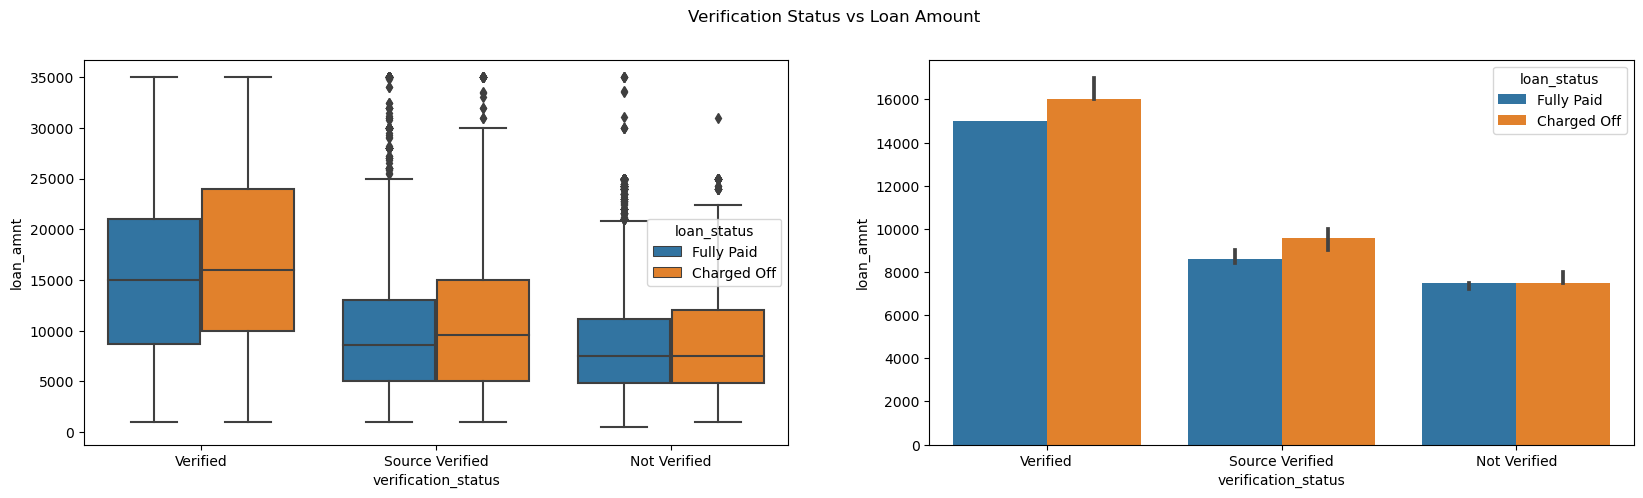

In [198]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs Loan Amount')
plt.show()

**Observations** <br>
- Verified loans are given more than other statuses
- When verified and source verified loans are defaulted, there is a small rise in the loan amount.

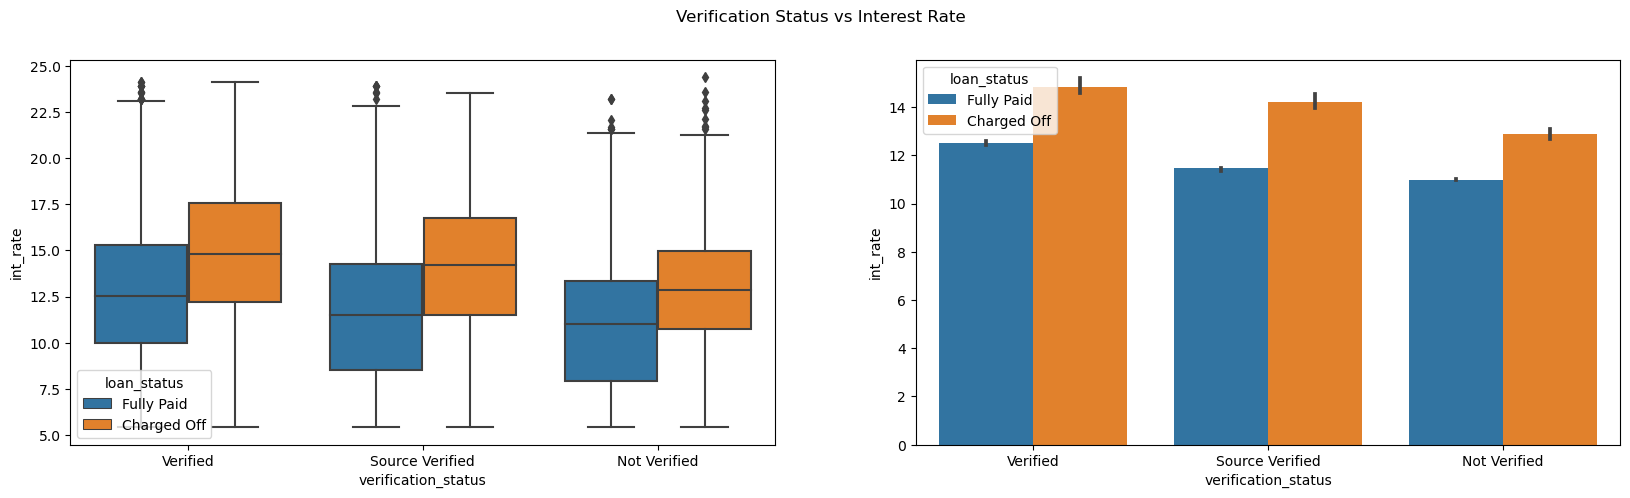

In [199]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs Interest Rate')
plt.show()

**Observation** <br>
- Higher interest rate tend to higher defaults.

### Purpose

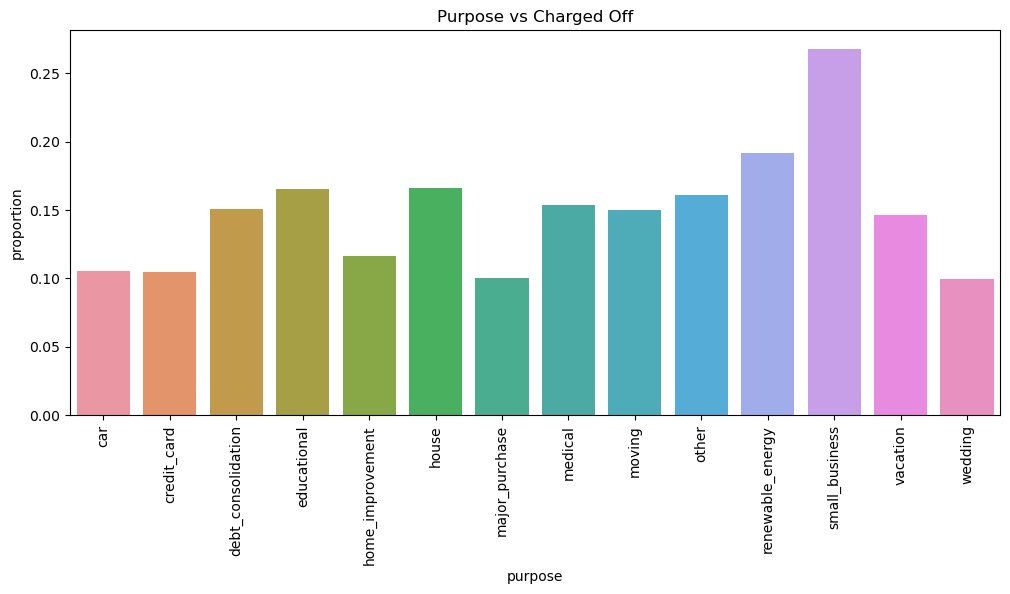

In [201]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('purpose')['id'].transform(lambda x: x/sum(x))
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='proportion', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Charged Off')
plt.show()

**Observations:**  
- Charged-off are higher for small_business comparitively.

<Figure size 640x480 with 0 Axes>

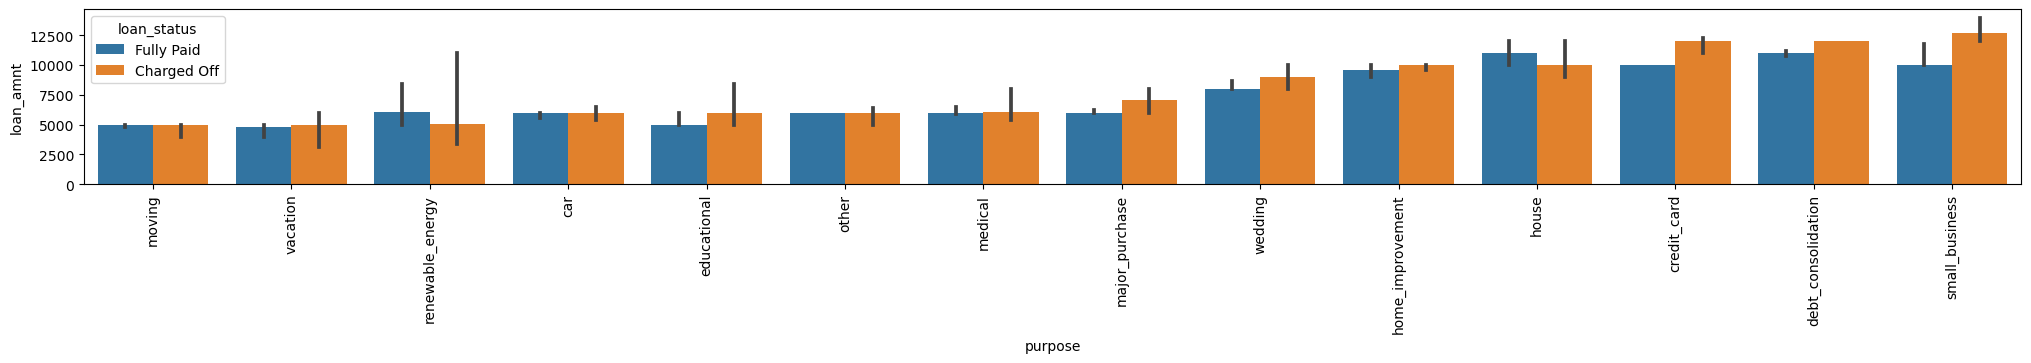

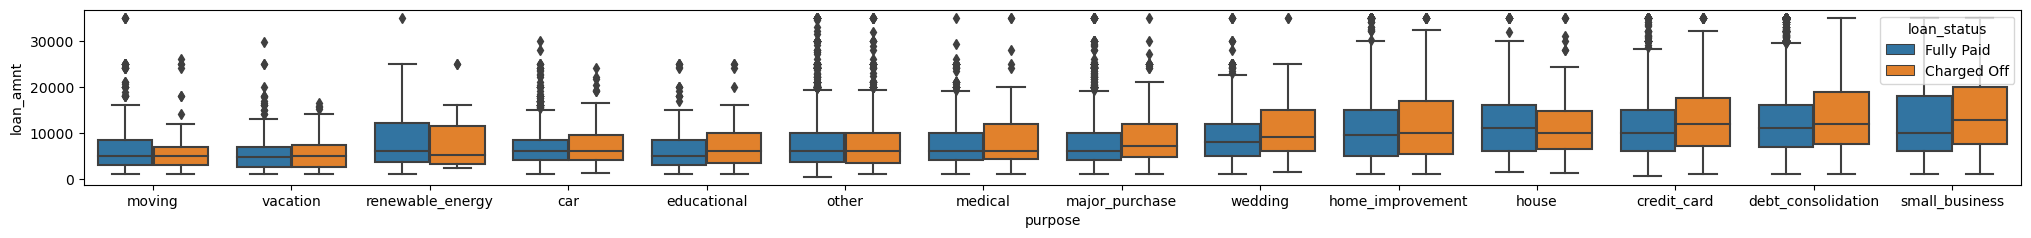

In [202]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()
plt.suptitle('Purpose vs Loan Amount')
plt.figure(figsize=(25,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data=data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)
plt.figure(figsize=(25,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

**Observations:**  
- Small Business has more defaults when the loan amount is also high.

<Figure size 640x480 with 0 Axes>

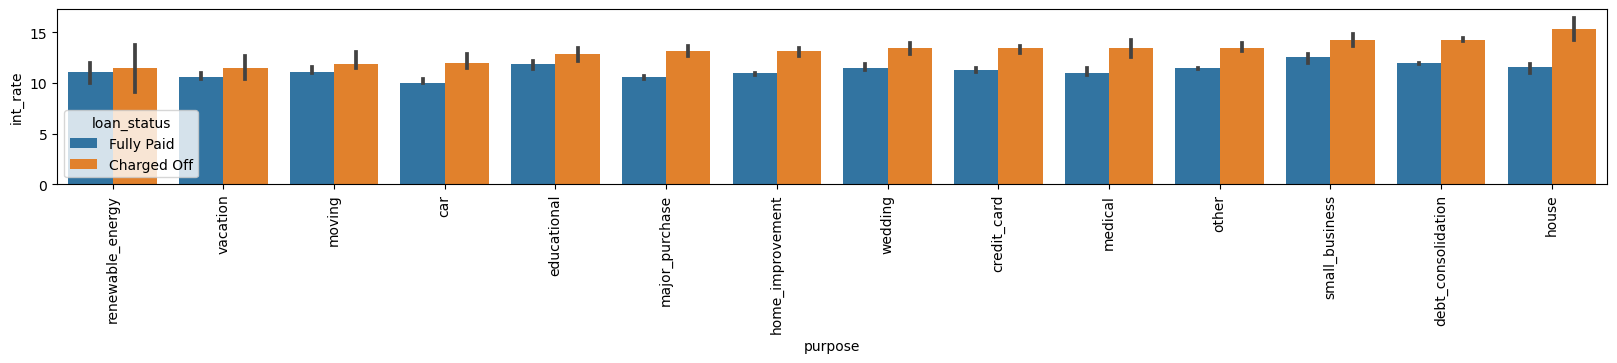

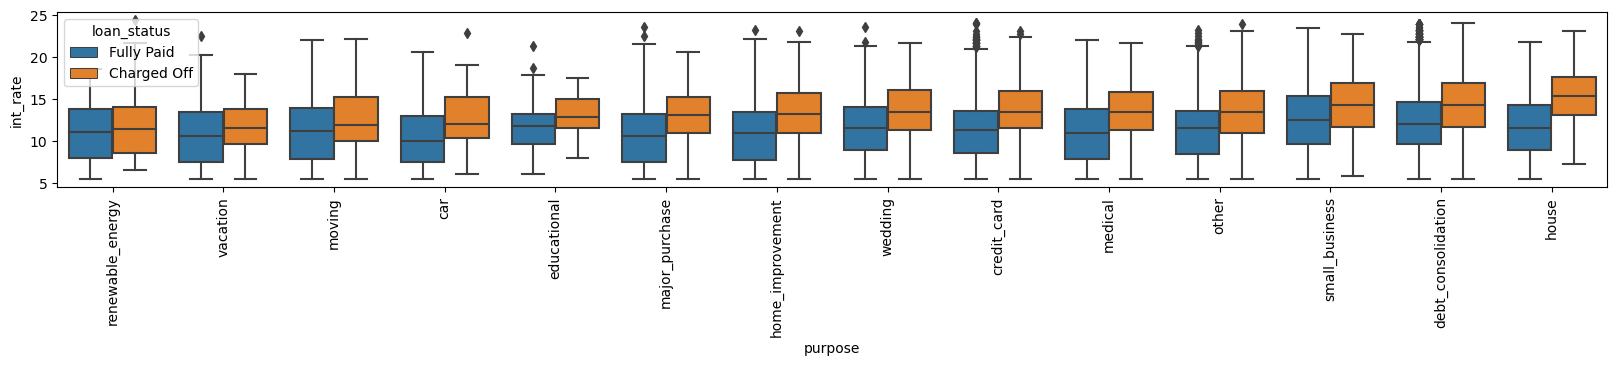

In [203]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
- Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

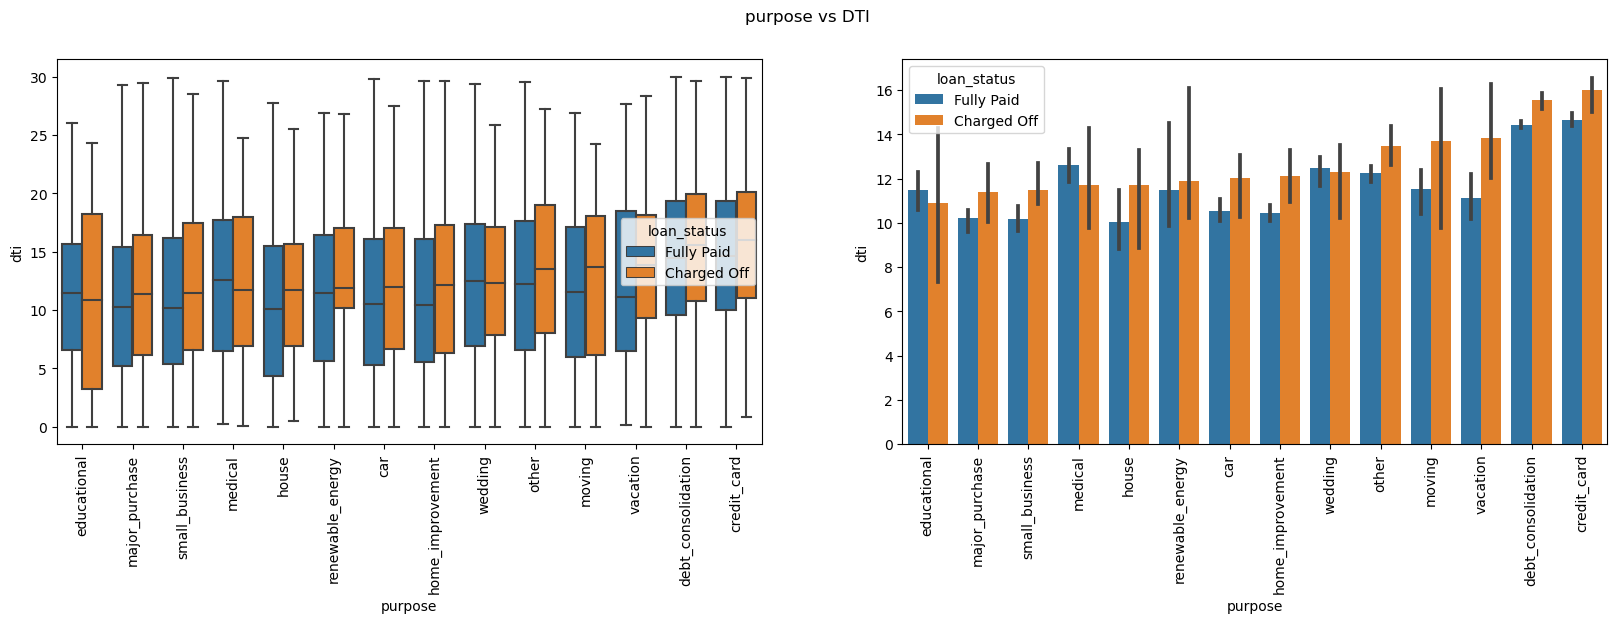

In [204]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
- Could not observe any pattern from the charts

### Loan Amount vs Interest Rate

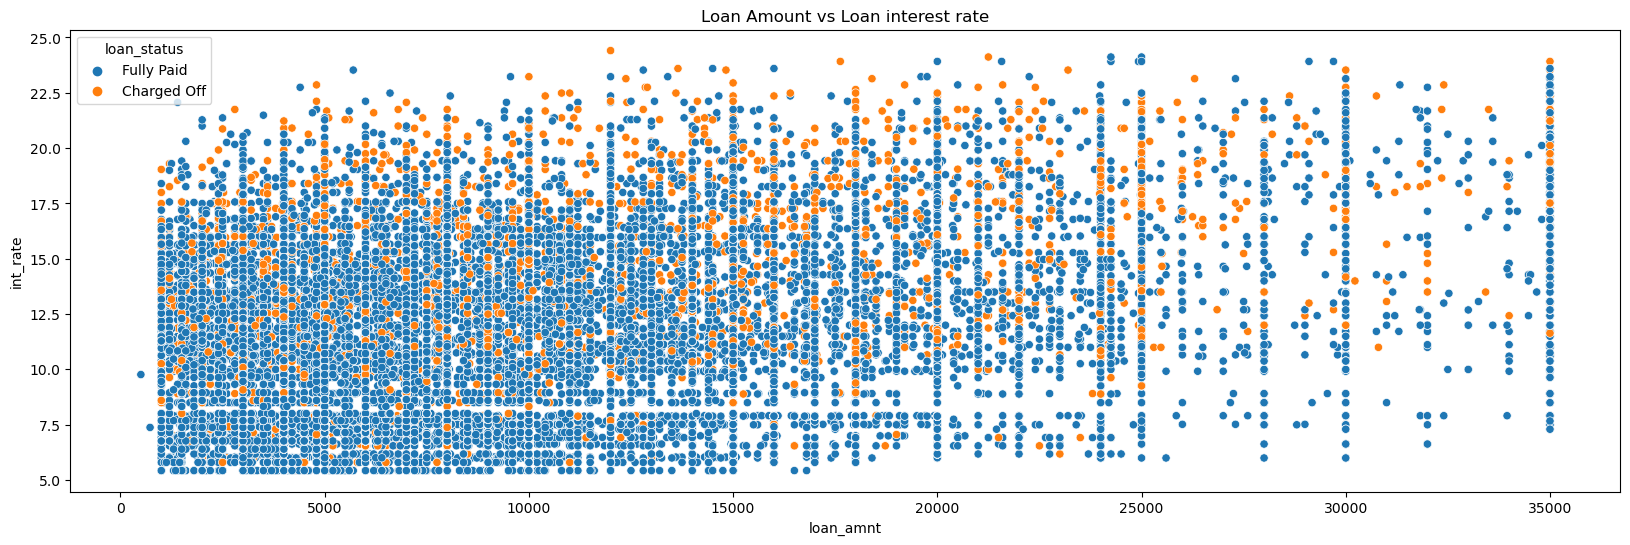

In [205]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

**Observartions**:  
- Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

### Loan Amount vs Annual income

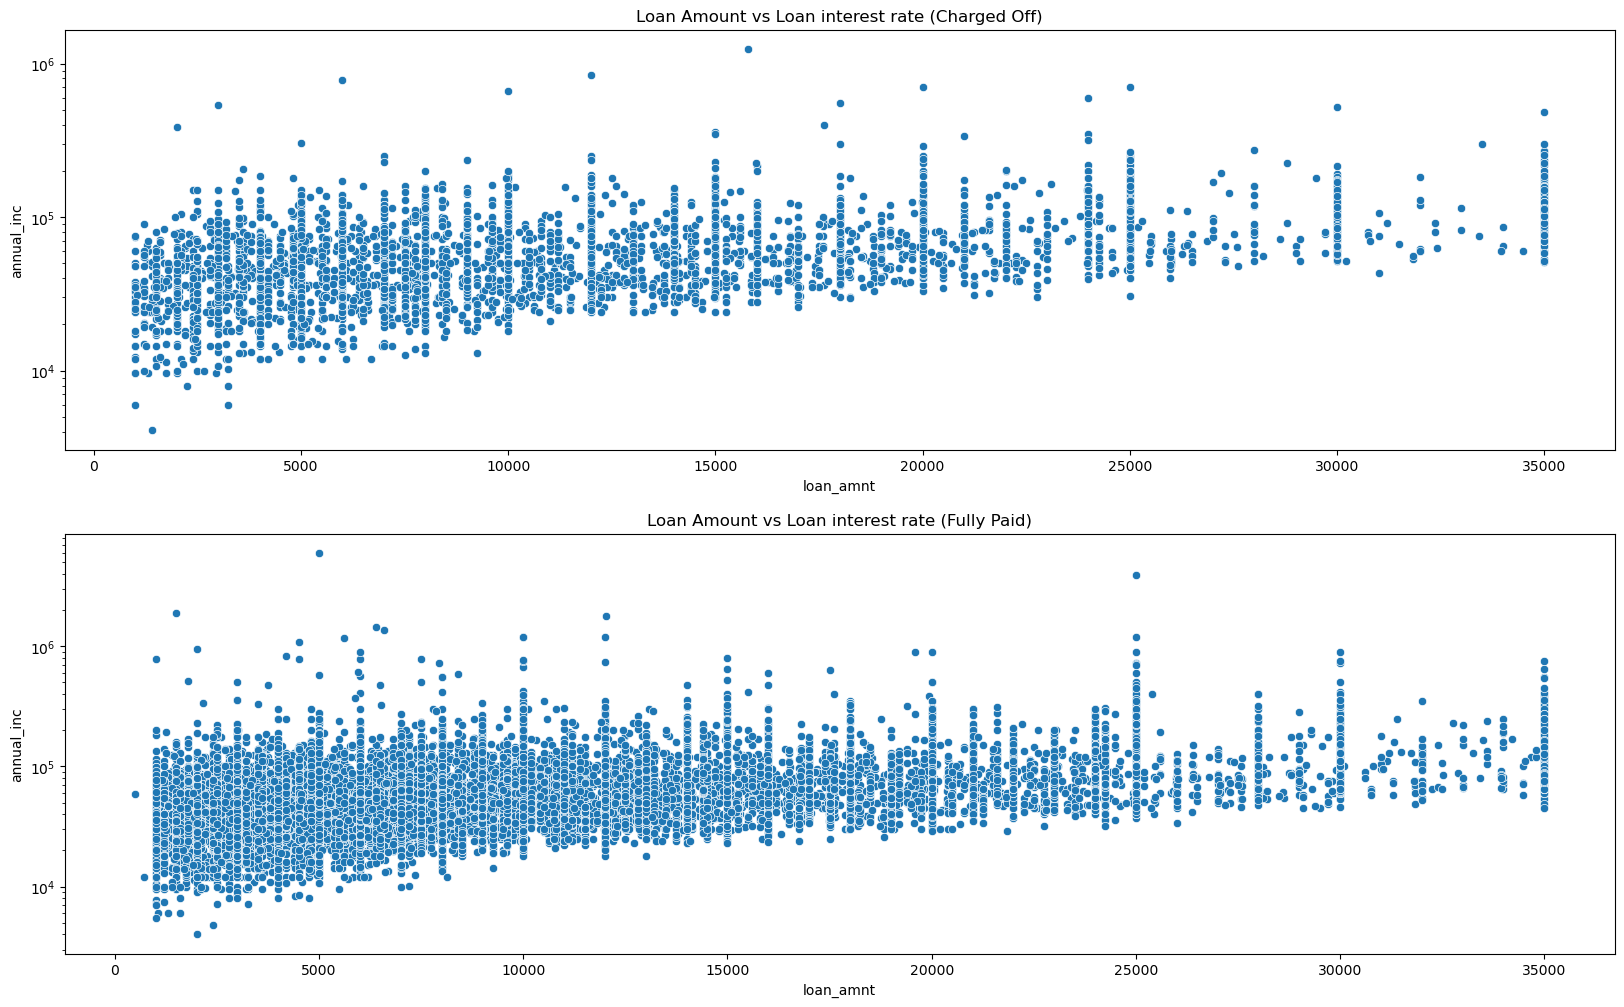

In [206]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

**Observations**  
- Both Fully paid and Charged Off loans are having similar pattern versus Annual income. We can fit a linear patter with a line which has very much less slope.

### Loan Amount vs DTI

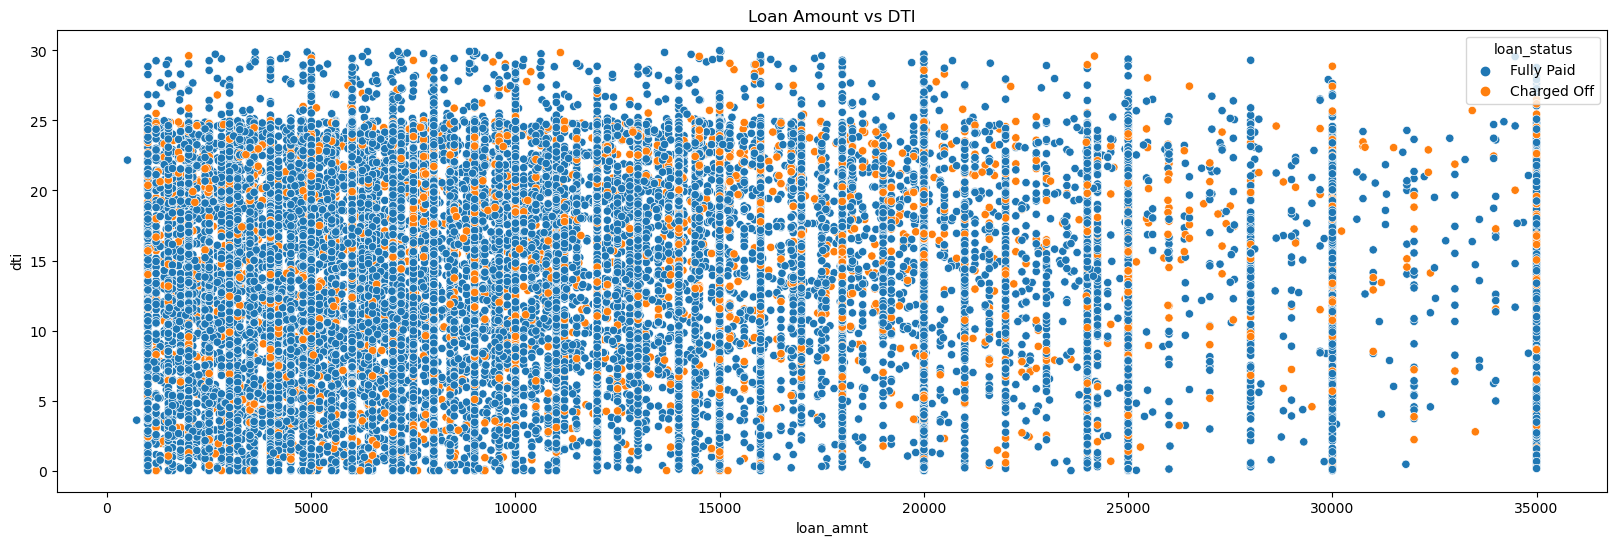

In [207]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=data, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

**Observartions**:  
- Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

### Interest Rate vs DTI

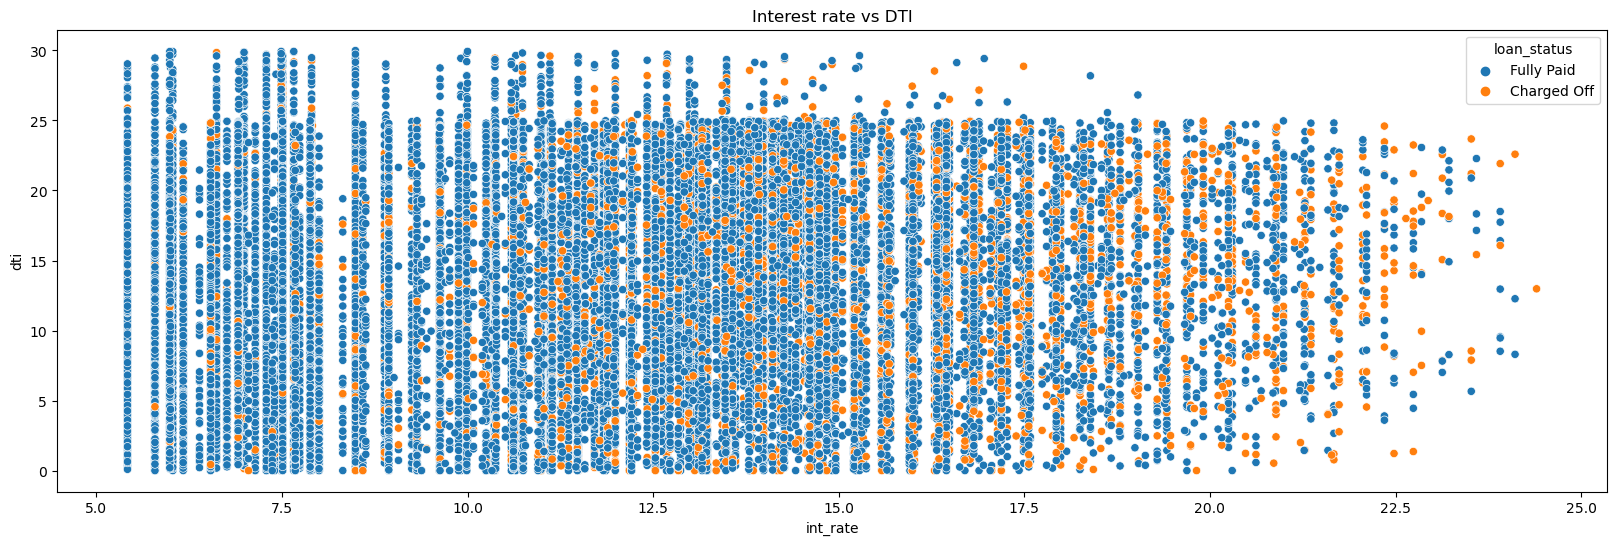

In [208]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=data, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

**Observations**  
- Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.

### Correlation Matrix
Let's find the correlation between the variables/columns of out data set.

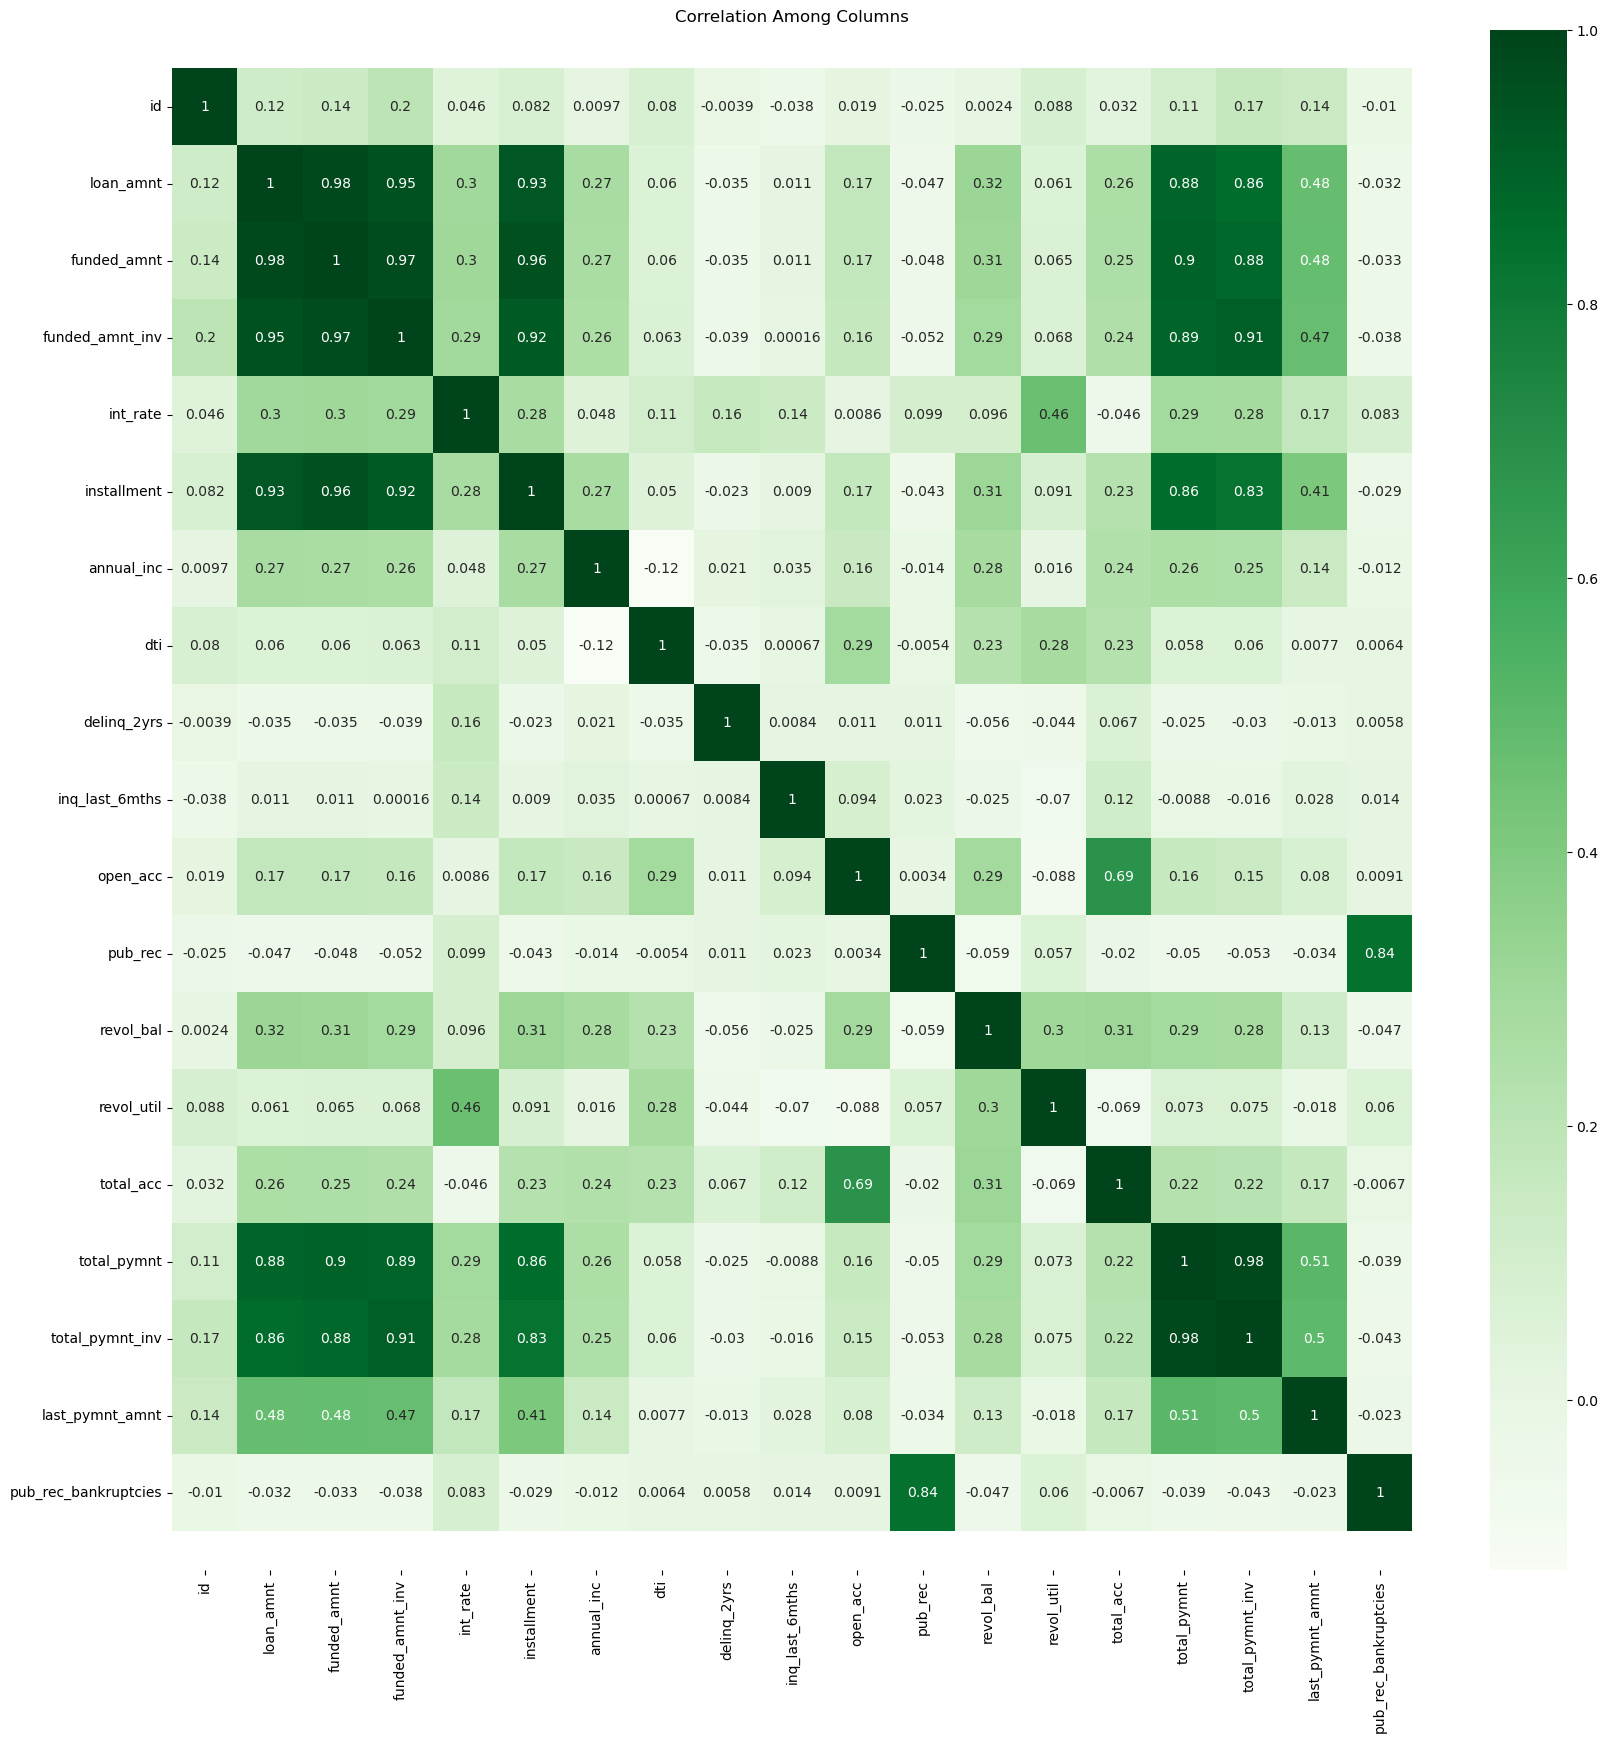

In [210]:
df = data[['id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
                  'annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',	
                  'pub_rec','revol_bal','revol_util','total_acc',	'total_pymnt','total_pymnt_inv',	
                  'last_pymnt_amnt','pub_rec_bankruptcies']]
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation Among Columns")
plt.show()